# **Pakistan's Largest E-Commerce Dataset**

## **1. Latar Belakang**
E-Commerce didefinisikan sebagai proses jual dan beli barang atau jasa termasuk produk digital melalui transaksi elektronik menggunakan jaringan internet atau media yang berbasis komputer lainnya (State Bank of Pakistan). Pertumbuhan E-Commerce di Pakistan sangat cepat dalam beberapa tahun terakhir. menurut Forbes, Pakistan berada di Top 5 Negara dengan laju pertumbuhan pasar freelance tercepat di Dunia mengalahkan India dan Russia yang memiliki jumlah penduduk yang jauh lebih besar ([E-Commerce Policy of Pakistan, hal. 29](https://www.commerce.gov.pk/wp-content/uploads/2019/11/e-Commerce_Policy_of_Pakistan_Web.pdf)). Dengan kondisi tersebut, Perusahaan akan melakukan study dengan data yang sudah diperoleh yang akan dianalisa supaya dapat memanfaatkan kondisi E-Commerce yang akan naik di masa-masa mendatang. 

## **2. Pernyataan Masalah**
Dalam E-Commerce, terdapat sebuah fitur bernama **DISKON** dimana fitur ini tentunya cukup digemari oleh sebagian orang karena memberikan potongan harga yang tentunya membuat harga barang yang dibeli menjadi lebih murah dari harga normalnya.<br>
Perusahaan ingin mengetahui apakah fitur **DISKON** tersebut memiliki terhadap hubungan perilaku konsumen dalam bertransaksi di E-Commerce. informasi ini akan membantu Perusahaan dalam menentukan strategi jual beli di masa-masa mendatang.<br>

Sebagai seorang *data analyst*, kita akan mencoba menjawab pertanyaan berikut:

**Bagaimana hubungan diskon dengan karakteristik transaksi pada E-Commerce, terutama dibandingkan dengan tidak menggunakan fitur diskon**

## **3. Data**

dataset ini didapat dari [di sini](https://www.kaggle.com/datasets/zusmani/pakistans-largest-ecommerce-dataset)


Mengacu dari informasi Kaggle bahwa Kumpulan data *pakistan's Largest E-Commerce Dataset* ini dikumpulkan sebagai bagian dari studi penelitian (Sensus Startup) di Startup E-Commerce Pakistan antara Januari 2016 hingga Desember 2018.
dataset ini memiliki catatan transaksi dari bulan Maret 2016 - Agustus 2018.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind

import warnings
warnings.filterwarnings("ignore")

kolom dataset ini berisi:
1. **Item_ID** = Nomor Barang
2. **Status** = Status barang tersebut (selesai, dibatalkan, dikembalikan, dll)
3. **created_at** = Tanggal pemesanan barang
4. **sku** = stock keeping unit, Nama Barang
5. **price** = Harga Barang
6. **qty_orered** = Banyaknya barang yang dipesan
7. **grand_total** = harga barang ditambah berapa banyak barang yang dipesan dikurangi diskon (grand_total = (price*qty_order)-discount_amount)
8. **increment_id** = kode pemesanan
9. **category_name_1** = kategori barang
10. **sales_commission_code** = kode komisi penjualan
11. **discount_amount** = jumlah diskon yang diterima pembeli
12. **payment_method** = metode pembayaran yang dilakukan pembeli
13. **Working_Date** = tanggal pengerjaan
14. **BI Status** = status proses pemesanan barang
15. **MV** = jika dilihat dengan kolom price, qty order, discount, dan grand total, MV merupakan harga total (price x qty order) sebelum dikenai diskon (MV = price*qty_order)
16. **Year** = Tahun pembuatan pesanan barang
17. **Month** = Bulan pembuatan pesanan barang
18. **Customer Since**: tanggal pembeli melakukan pendaftaran
19. **M-Y** = gabungan pembuatan pesanan antara kolom Year & Month
20. **FY** = (Fiscal Year) Tahun fiskal perusahaan.
21. **Customer ID** = Nomor identitas pembeli
22. **Unnamed: 21** = Data kosong yang tidak kaitannya dengan kolom lainnya
23. **Unnamed: 22** = Data kosong yang tidak kaitannya dengan kolom lainnya
24. **Unnamed: 23** = Data kosong yang tidak kaitannya dengan kolom lainnya
25. **Unnamed: 24** = Data kosong yang tidak kaitannya dengan kolom lainnya
26. **Unnamed: 25** = Data kosong yang tidak kaitannya dengan kolom lainnya

In [2]:
pd.set_option('display.max_columns', None) #menampilkan seluruh kolom

In [3]:
df_a=pd.read_csv(r'D:\Aal\Data_Science\Purwadhika\DS-ML\Modul-2\Capstone\dataset\Pakistan Largest Ecommerce Dataset.csv') #import dataset
df=df_a.copy()
display(df.head(), df.tail())

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,1950.0,100147443,Women's Fashion,\N,0.0,cod,7/1/2016,#REF!,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0,NaN,NaN,NaN,NaN,NaN
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Bo...,240.0,1.0,240.0,100147444,Beauty & Grooming,\N,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0,NaN,NaN,NaN,NaN,NaN
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,2450.0,100147445,Women's Fashion,\N,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0,NaN,NaN,NaN,NaN,NaN
3,211135.0,complete,7/1/2016,kcc_krone deal,360.0,1.0,60.0,100147446,Beauty & Grooming,R-FSD-52352,300.0,cod,7/1/2016,Net,360,2016.0,7.0,2016-7,7-2016,FY17,4.0,NaN,NaN,NaN,NaN,NaN
4,211136.0,order_refunded,7/1/2016,BK7010400AG,555.0,2.0,1110.0,100147447,Soghaat,\N,0.0,cod,7/1/2016,Valid,"1,110",2016.0,7.0,2016-7,7-2016,FY17,5.0,NaN,NaN,NaN,NaN,NaN


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
1048570,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048572,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048573,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1048574,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **3.1 Data Understanding and Cleaning**
Sebelum masuk ke dalam analisis, kita perlu mengenal dataset kita lebih jauh dalam tahapan *data understanding*. Dari proses ini, kita akan tahu anomali-anomali apa saja yang terdapat di dalam dataset kita dan perlu ditangani dalam tahapan *data cleaning*. Setiap penangan anomali yang dilakukan, akan disertai dengan justifikasi langkah yang diambil, baik secara *domain knowledge* maupun secara statistik.

Pertama, mari kita lihat informasi umum dari dataset.

In [4]:
print(f'Jumlah baris pada dataset ini adalah {df.shape[0]} sedangkan kolom berjumlah {df.shape[1]}')
df.info()

Jumlah baris pada dataset ini adalah 1048575 sedangkan kolom berjumlah 26
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   item_id                584524 non-null  float64
 1   status                 584509 non-null  object 
 2   created_at             584524 non-null  object 
 3   sku                    584504 non-null  object 
 4   price                  584524 non-null  float64
 5   qty_ordered            584524 non-null  float64
 6   grand_total            584524 non-null  float64
 7   increment_id           584524 non-null  object 
 8   category_name_1        584360 non-null  object 
 9   sales_commission_code  447349 non-null  object 
 10  discount_amount        584524 non-null  float64
 11  payment_method         584524 non-null  object 
 12  Working Date           584524 non-null  object 
 13  BI Status    

In [5]:
display(df.describe(), df.describe(include='object'))

,item_id,price,qty_ordered,grand_total,discount_amount,Year,Month,Customer ID,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
count,584524.000000,5.845240e+05,584524.000000,5.845240e+05,584524.000000,584524.000000,584524.000000,584513.000000,0.0,0.0,0.0,0.0,0.0
mean,565667.074218,6.348748e+03,1.296388,8.530619e+03,499.492775,2017.044115,7.167654,45790.511965,NaN,NaN,NaN,NaN,NaN
std,200121.173648,1.494927e+04,3.996061,6.132081e+04,1506.943046,0.707355,3.486305,34414.962389,NaN,NaN,NaN,NaN,NaN
min,211131.000000,0.000000e+00,1.000000,-1.594000e+03,-599.500000,2016.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,395000.750000,3.600000e+02,1.000000,9.450000e+02,0.000000,2017.000000,4.000000,13516.000000,NaN,NaN,NaN,NaN,NaN
50%,568424.500000,8.990000e+02,1.000000,1.960400e+03,0.000000,2017.000000,7.000000,42856.000000,NaN,NaN,NaN,NaN,NaN
75%,739106.250000,4.070000e+03,1.000000,6.999000e+03,160.500000,2018.000000,11.000000,73536.000000,NaN,NaN,NaN,NaN,NaN
max,905208.000000,1.012626e+06,1000.000000,1.788800e+07,90300.000000,2018.000000,12.000000,115326.000000,NaN,NaN,NaN,NaN,NaN


,status,created_at,sku,increment_id,category_name_1,sales_commission_code,payment_method,Working Date,BI Status,MV,Customer Since,M-Y,FY
count,584509,584524,584504,584524,584360,447349,584524,584524,584524,584524,584513,584524,584524
unique,16,789,84889,408785,16,7226,18,789,4,9720,26,26,3
top,complete,11/25/2016,MATSAM59DB75ADB2F80,100266667,Mobiles & Tablets,\N,cod,11/25/2016,Net,999,2016-11,11-2017,FY18
freq,233685,15169,3775,72,115710,339001,271960,15169,234178,9516,82714,83928,306883


In [6]:
pd.set_option('display.max_colwidth', -1)
# data unik di tiap kolom
unik = []
for col in df.columns :
    unik.append( [col, df[col].nunique(), df[col].unique()])

data_unik = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=unik)
data_unik

,Column Name,Number of Unique,Unique Sample
0,item_id,584524,"[211131.0, 211133.0, 211134.0, 211135.0, 211136.0, 211137.0, 211138.0, 211139.0, 211140.0, 211141.0, 211142.0, 211143.0, 211144.0, 211145.0, 211146.0, 211147.0, 211149.0, 211150.0, 211151.0, 211152.0, 211153.0, 211154.0, 211155.0, 211156.0, 211157.0, 211158.0, 211160.0, 211162.0, 211163.0, 211164.0, 211166.0, 211168.0, 211169.0, 211170.0, 211171.0, 211172.0, 211173.0, 211174.0, 211175.0, 211176.0, 211177.0, 211179.0, 211180.0, 211182.0, 211184.0, 211185.0, 211186.0, 211187.0, 211188.0, 211189.0, 211190.0, 211191.0, 211192.0, 211193.0, 211194.0, 211196.0, 211197.0, 211198.0, 211199.0, 211200.0, 211202.0, 211201.0, 211203.0, 211204.0, 211205.0, 211206.0, 211207.0, 211208.0, 211209.0, 211211.0, 211212.0, 211213.0, 211214.0, 211215.0, 211217.0, 211218.0, 211219.0, 211220.0, 211221.0, 211222.0, 211223.0, 211225.0, 211224.0, 211226.0, 211227.0, 211228.0, 211229.0, 211230.0, 211231.0, 211232.0, 211233.0, 211234.0, 211235.0, 211236.0, 211237.0, 211238.0, 211239.0, 211240.0, 211241.0, 211242.0, ...]"
1,status,16,"[complete, canceled, order_refunded, received, refund, closed, fraud, holded, exchange, pending_paypal, paid, \N, cod, pending, nan, processing, payment_review]"
2,created_at,789,"[7/1/2016, 7/2/2016, 7/3/2016, 7/4/2016, 7/5/2016, 7/6/2016, 7/7/2016, 7/8/2016, 7/9/2016, 7/10/2016, 7/11/2016, 7/12/2016, 7/13/2016, 7/14/2016, 7/15/2016, 7/16/2016, 7/17/2016, 7/18/2016, 7/19/2016, 7/20/2016, 7/21/2016, 7/22/2016, 7/23/2016, 7/24/2016, 7/25/2016, 7/26/2016, 7/27/2016, 7/28/2016, 7/29/2016, 7/30/2016, 7/31/2016, 8/1/2016, 8/2/2016, 8/3/2016, 8/4/2016, 8/5/2016, 8/6/2016, 8/7/2016, 8/8/2016, 8/9/2016, 8/10/2016, 8/11/2016, 8/12/2016, 8/13/2016, 8/14/2016, 8/15/2016, 8/16/2016, 8/17/2016, 8/18/2016, 8/19/2016, 8/20/2016, 8/21/2016, 8/22/2016, 8/23/2016, 8/24/2016, 8/25/2016, 8/26/2016, 8/27/2016, 8/28/2016, 8/29/2016, 8/30/2016, 8/31/2016, 9/1/2016, 9/2/2016, 9/3/2016, 9/4/2016, 9/5/2016, 9/6/2016, 9/7/2016, 9/8/2016, 9/9/2016, 9/10/2016, 9/11/2016, 9/12/2016, 9/13/2016, 9/14/2016, 9/15/2016, 9/16/2016, 9/17/2016, 9/18/2016, 9/19/2016, 9/20/2016, 9/21/2016, 9/22/2016, 9/23/2016, 9/24/2016, 9/25/2016, 9/26/2016, 9/27/2016, 9/28/2016, 9/29/2016, 9/30/2016, 10/1/2016, 10/2/2016, 10/3/2016, 10/4/2016, 10/5/2016, 10/6/2016, 10/7/2016, 10/8/2016, ...]"
3,sku,84889,"[kreations_YI 06-L, kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free, Ego_UP0017-999-MR0, kcc_krone deal, BK7010400AG, UK_Namkino All In One 200 Gms, UK_Namkino Mix Nimco 400 Gms, Apple iPhone 6S 64GB, GFC_Pedestal Myga Cross Base (Special Guard) 24"", BK1070200PL, BK1130200CF, kcc_Sultanat, kcc_glamour deal, Assetmen_MD-346-M, cr_DATES WITH CASHEW-400 GM, UK_Gift Box Mix Dry Fruit Sweets 500 Gms, itter_AB 1199, RL_B005, bed&rest_S7, L&L_LLHLE8224S, J&J_JJR-4, J&J_JJR-20, D Lend a Helping Hand, Mochika_M0001112-12, Mochika_M0001112-8, SKMT_Blood Test, SKMT_Medicine, sputnik_701/5-11, Ctees-Black Zip- Up Hoodie-XL, Samsung Galaxy J5, Veet_4, RS_Gulab jaman Tin, cr_PEANUT SALTY-200 GM, Oriflame_21557, JBS_TAT-128, Ajmery_BRR-590-M, HOS_GUCFW75, Lexon_LL116B-Blue, kcc_Fantasy Perfumed Talcum Powder-200gm, 2Zee_SC6, Q MOBILE Noir X20, rehaab_RJ160047, Farah_3-B, RS_Sohan Halwa Tin, UK_Soan Papdi Original 250 Gms, UK_Gift Box Soghaat 500 Gms, RS_Double Delight, Al Muhafiz Sohan Halwa Almond, UK_Gift Box Baklawa 500 Gms, sputnik_2146/6-8, kkc_Kingtox 450ml Classic Green All Insect Killer Spray, Al Muhafiz Sohan Halwa Walnut, RS_Honey Dry Fruit Halwa, itter_AB 1214, Eco Star_40U557, Orient_OR-6057 GX LGFD LV, HOS_JPGCW100, kkc_Jasmine King Air Freshener, asimjofaeanew_5A, ajmery_F9-981, hijabh_JILBAB-C (1)-52x, noritake_NTM163M, RS_Habshi Halwa Tin, sentiments_WRK1612, bata_comfit-8613714-43-9, UK_Namkino Mix Nimco 8 Pcs Gift Pack, Inoxy_Inoxy Hair Miracle Elixir, RS_Chum Chum Tin, Dany_AUK-650 , urban_ PT004-L, jackpot_JP-7999, UK_Gift Box Pistachio Delight 500 Gms, test_tcsconnect, sst_Lyquin-Regular fit-Large, 

Secara umum, kita bisa melihat bahwa:
* dataset ini memiliki 26 kolom dan 1.048.575 baris.
* semua kolom memiliki data kosong, yang diwakili dengan data NaN.
* kolom `Unnamed: 21`,  `Unnamed: 22`,  `Unnamed: 23`,  `Unnamed: 24`, dan `Unnamed: 25` berisi 100% data kosong sehingga tidak relevan dalam analisis dan bisa dihapus saja.
* kolom `status`, `category_name_1`, dan `sales_comission_code` memiliki data dengan value '\N', sedangkan kolom `BI Status` memiliki data dengan value '#REF!' sehingga akan ditangani.
* kolom `grand_total` dan `discount_amount` terdapat data minus, dan pada kolom `price` terdapat data dengan value 0. hal ini tidak masuk akal sehingga akan ditangani.
* beberapa data pada kolom `grand_total` tidak mencerminkan perhitungan yang semestinya, sehingga akan ditangani.
* kolom ` MV` terdapat spasi ((spasi)MV(spasi)) sehingga akan dirubah dan merubah kolom `category_name_1` menjadi `category`.
* beberapa kolom, seperti `Working Date`, `BI Status`, `Year`, `Month`, `Customer Since`, `FY` dan `Customer ID` memiliki huruf Kapital dalam penulisannya, sehingga akan dirubah menjadi huruf kecil semua dan diberikan separator (_) pada kolom yang memiliki 2 kata.
* Urutan kolom akan diatur ulang untuk mempermudah proses analisis selanjutnya.

#### **3.2 Anomali Data**

##### **3.2.1 Missing Value**

In [7]:
persen_missing=pd.DataFrame((df.isna().sum()/df.shape[0]*100).round(3).astype(str) + '%')
persen_missing.columns = ['Presentase']
persen_missing.index.name = 'Kolom' 
persen_missing  # persentase missing value tiap kolom

,Presentase
Kolom,
item_id,44.255%
status,44.257%
created_at,44.255%
sku,44.257%
price,44.255%
qty_ordered,44.255%
grand_total,44.255%
increment_id,44.255%
category_name_1,44.271%


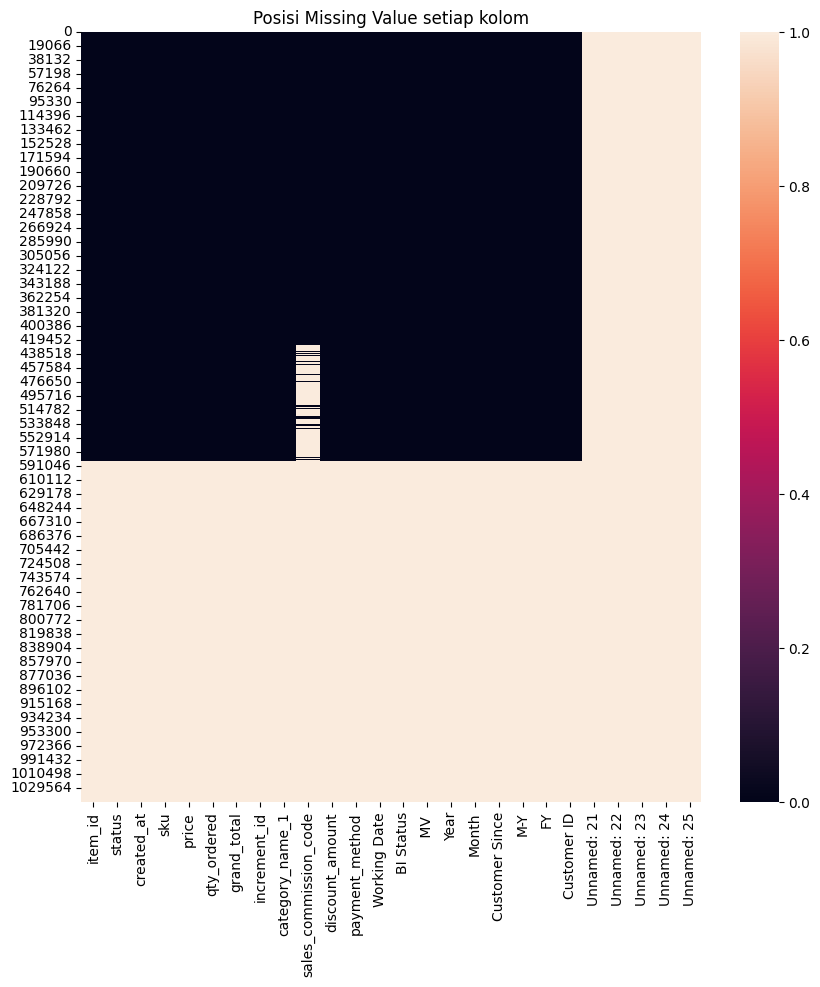

In [8]:
# Sebaran missing value di dalam data
plt.figure(figsize=(10,10))
sns.heatmap(df.isna())
plt.title('Posisi Missing Value setiap kolom')
plt.show()

Secara garis besar:  
* *missing value* di kolom `Unnamed: 21`,  `Unnamed: 22`,  `Unnamed: 23`,  `Unnamed: 24`, dan `Unnamed: 25` sebanyak **100%**.
* *missing value* untuk kolom lain sebesar > **44%** sedangkan pada kolom `sales_comission_code` di angka **57%**.

Ada 2 cara untuk menangani *missing value*:
* **pertama**, menghapus baris/kolom yang berisi *missing value*.\
a) kolom `Unnamed: 21`,  `Unnamed: 22`,  `Unnamed: 23`,  `Unnamed: 24`, dan `Unnamed: 25` akan dihapus karena **100%** datanya adalah *missing value*.\
b) untuk kolom `item_id`, `status`, `created_at`, `sku`, `price`, `qty_ordered`, `grand_total`, `increment_id`, `category_name_1`, `sales_comission_code`, `discount_amount`, `payment_method`, `Working Date`, `BI Status`, `MV`, `Year`, `Month`, `Customer Since`, `M-Y`, `FY`, dan `Customer ID` akan dihapus juga *missing value* nya karena setelah dilihat melalui heatmap **posisi data** *missing value* relatif pada baris yang sama walaupun presentase *missing value* nya sangat tinggi (> 44%).
* **kedua**, mengisi data yang hilang. Ada beberapa metode yang bisa digunakan untuk mengisi missing value, cara yang paling baik adalah dengan mengisi data yang hilang dengan nilai sebenarnya, atau sedekat mungkin dengan nilai asli. Dalam kasus ini, kita akan mencoba mengisi *missing value* berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika masih ada kolom yang tidak bisa diisi, barulah kita mengisi dengan angka *mean, median* atau *modus*. Menghapus data akan menjadi opsi terakhir.

**3.2.1.1 Menghapus kolom Unnamed**\
*missing value* di kolom `Unnamed: 21`,  `Unnamed: 22`,  `Unnamed: 23`,  `Unnamed: 24`, dan `Unnamed: 25` sebanyak **100%**

In [9]:
df.drop(columns=['Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25'], inplace=True)

**3.2.1.2 Menghapus *Missing Value* pada kolom `item_id`**
* setelah dilihat melalui heatmap **posisi data** *missing value* relatif pada baris yang sama walaupun presentase *missing value* nya sangat tinggi (> 44%)
* kolom `item_id` tidak memiliki data yang sama disetiap barisnya, sehingga kita anggap kolom ini mewakili data unik pada data ini yang akan kita hapus selanjutnya

In [10]:
df.dropna(subset='item_id', inplace=True, axis=0)

Kondisi data setelah dilakukan penghapusan *missing value* pada kolom `item_id`, ada beberapa kolom yang masih memiliki data kosong, yaitu `status`, `sku`, `category_name_1`, `sales_commission_code`, `Customer Since`, dan `Customer ID`.

In [11]:
pd.DataFrame(df.isna().sum()).transpose()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,sales_commission_code,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
0,0,15,0,20,0,0,0,0,164,137175,0,0,0,0,0,0,0,11,0,0,11


**3.2.1.3 Menghapus kolom `sales_commission_code`**<br>
kolom `sales_commission_code` memiliki *missing value* dengan bentuk *NaN* dan *\N* sehingga kita akan coba melihat berapa proporsi missing valuenya 

In [12]:
rasio = df['sales_commission_code'].loc[df['sales_commission_code']=='\\N'].count()/len(df)
rasio_nan = df['sales_commission_code'].isna().sum()/len(df)
print(f'''Rasio data dengan value '\\N' pada kolom 'sales_commission_code' adalah {rasio}%''')
print(f'''Rasio data dengan value 'NaN' pada kolom 'sales_commission_code' adalah {rasio_nan}%''')
print(f'Total Missing Value sebesar {rasio+rasio_nan}%')

Rasio data dengan value '\N' pada kolom 'sales_commission_code' adalah 0.5799607886074823%
Rasio data dengan value 'NaN' pada kolom 'sales_commission_code' adalah 0.23467813126578208%
Total Missing Value sebesar 0.8146389198732644%


In [13]:
df.groupby('sales_commission_code')['discount_amount'].value_counts().sort_values(ascending=False).head()

sales_commission_code  discount_amount
\N                     0.0                211693
                       1000.0             2634  
                       500.0              2577  
                       2000.0             2099  
                       200.0              1852  
Name: discount_amount, dtype: int64

berdasarkan hasil investigasi kita, ditemukan bahwa kolom `sales_commission_code` tidak memiliki hubungan dengan kolom yang lain, sebagai contoh terlihat dengan `sales_commission_code` *\N* nilai `discount_amount` bervariasi tidak hanya bernilai 0. Sehingga kita memutusknan untuk **drop** kolom ini.

In [14]:
df.drop(columns='sales_commission_code', inplace=True)

**3.2.1.4 Menghapus *Missing Value* pada kolom `Customer Since` dan `Customer ID`**

In [15]:
df[df['Customer ID'].isna()].head(3)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
427377,726862.0,order_refunded,1/5/2018,BAGLOR5A12C5C756AE5,209.0,1.0,1074.0,100443451,Beauty & Grooming,0.0,cod,1/5/2018,Valid,209,2018.0,1.0,NaN,1-2018,FY18,NaN
427378,726863.0,order_refunded,1/5/2018,WOFGUL59C24CC9BE5D9,720.0,1.0,1074.0,100443451,Women's Fashion,0.0,cod,1/5/2018,Valid,720,2018.0,1.0,NaN,1-2018,FY18,NaN
427379,726864.0,order_refunded,1/5/2018,BAGNAD59E0AAC250E6D,145.0,1.0,1074.0,100443451,Beauty & Grooming,0.0,cod,1/5/2018,Valid,145,2018.0,1.0,NaN,1-2018,FY18,NaN


* **11 *missing value*** pada kolom `Customer ID` ternyata berada pada baris yang sama dengan **11 *missing value*** pada kolom `Customer Since`.
* Kita kesulitan mengisi *missing value* pada `Customer ID` karena tidak menemukan pola dan cara bagaimana untuk mengisinya.
* pun dengan *missing value* pada `Customer Since`, kita melihat ada kesamaan data antara kolom `M-Y` dengan `Customer ID` namun setelah kita cek ternyata datanya juga bervariasi.

In [16]:
df[['Customer Since','M-Y']].loc[df['FY']=='FY19'].head() 
# tidak memungkinkan diganti Customer since dengan M-Y, walau terlihat sama tapi karena setelah dicek berbeda 

,Customer Since,M-Y
560472,2018-6,7-2018
560473,2018-6,7-2018
561591,2016-11,7-2018
561592,2016-11,7-2018
561593,2018-7,7-2018


In [17]:
(df['Customer ID'].isna().sum()/len(df['Customer ID']))*100

0.001881873113849902

karena ketidak mungkinan untuk mengisi kolom `Customer ID` dan `Customer Since` dan juga jumlah *missing value* yang sangat sedikit (0.002%), sehingga kita akan melakukan **drop** untuk *missing value* pada 2 kolom tersebut.

In [18]:
df.dropna(subset=['Customer Since','Customer ID'], axis=0, inplace=True)

**3.2.1.5 Penanganan *Missing Value* pada kolom `status`**

In [19]:
df[df['status'].isna()].head(3)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
477519,783751.0,NaN,3/15/2018,OTHPCB5A7D8A0BD10E8,8000.0,1.0,8000.0,100479380,Others,0.0,cod,3/15/2018,Gross,"8,000",2018.0,3.0,2018-3,3-2018,FY18,95141.0
513736,827187.0,NaN,4/16/2018,KABOXF5ABCC75C7E2F7-32,370.0,1.0,2707.0,100513933,Kids & Baby,0.0,cod,4/16/2018,Gross,370,2018.0,4.0,2018-4,4-2018,FY18,105059.0
513737,827189.0,NaN,4/16/2018,KABSHO5AA77C331466F-11-13 Years,473.0,1.0,2707.0,100513933,Kids & Baby,0.0,cod,4/16/2018,Gross,473,2018.0,4.0,2018-4,4-2018,FY18,105059.0


ada 15 *missing value* pada kolom `status` dimana ada **pola** yang bisa terbaca, yaitu semua missing value pada kolom `status` memiliki nilai pada kolom `BI Status` yaitu Gross. sehingga, perlu diinvestigasi hubungan antara kolom `status` dan `BI Status`.

In [20]:
df.groupby('BI Status')['status'].value_counts()

BI Status  status        
#REF!      complete          1     
Gross      canceled          201244
           payment_review    57    
           pending           48    
           processing        33    
           holded            31    
           fraud             10    
           pending_paypal    7     
           \N                4     
Net        complete          233684
           closed            494   
Valid      received          77289 
           order_refunded    59524 
           refund            8050  
           cod               2859  
           paid              1159  
           exchange          4     
Name: status, dtype: int64

* pada kolom `BI Status` dengan nilai Gross, nilai pada kolom `status` terkategori menjadi (canceled, payment_review, pending, processing, holded, fraud, pending_paypal, dan \N)
* karena kolom `status` berbentuk kategorikal, maka kita akan mengisi *missing value* pada kolom `status` dengan **mode** di mana `BI Status` nya adalah Gross. sehingga akan *missing value* pada kolom `status` akan diisi dengan *canceled*

In [21]:
df['status']=df['status'].fillna(df['status'].loc[df['BI Status']=='Gross'].mode()[0])

* ternyata pada kolom `status` masih ada *missing value* dengan nilai ***\N*** sejumlah 4 baris, dengan `BI Status` nya adalah Gross. sehingga penanganan sama dengan metode sebelumnya.

In [22]:
df[df['status']=='\\N'].head(3)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
255520,526623.0,\N,7/3/2017,test-product-3,3.0,2.0,231.0,100332005,\N,0.0,cod,7/3/2017,Gross,6,2017.0,7.0,2016-7,7-2017,FY18,1423.0
255521,526624.0,\N,7/3/2017,test-product,75.0,1.0,231.0,100332005,\N,0.0,cod,7/3/2017,Gross,75,2017.0,7.0,2016-7,7-2017,FY18,1423.0
255624,526754.0,\N,7/3/2017,test-product-3,3.0,2.0,231.0,100332075,\N,0.0,cod,7/3/2017,Gross,6,2017.0,7.0,2016-7,7-2017,FY18,1423.0


In [23]:
df['status']=df['status'].replace('\\N',df['status'].loc[df['BI Status']=='Gross'].mode()[0])

**3.2.1.6 Penanganan *Missing Value* pada kolom `BI Status`**<br>
karena pembahasan masih mengenai kolom `status` dan `BI Status`, kita akan melanjutkan penangan *missing value* pada kolom `BI Status`
* pada kolom `BI Status` terdapan *missing value* dengan nilai ***#REF!***
* kita akan melakukan penangan dengan metode yang sama dengan sub-bab 3.2.1.5

In [24]:
df.groupby('BI Status')['status'].value_counts()

BI Status  status        
#REF!      complete          1     
Gross      canceled          201263
           payment_review    57    
           pending           48    
           processing        33    
           holded            31    
           fraud             10    
           pending_paypal    7     
Net        complete          233684
           closed            494   
Valid      received          77289 
           order_refunded    59524 
           refund            8050  
           cod               2859  
           paid              1159  
           exchange          4     
Name: status, dtype: int64

* pada kolom `BI Status` dengan nilai *#REF!*, nilai pada kolom `status` hanya ter-rekognisi sebagai *complete*
* Dimana nilai *complete* pada kolom `status`, hanya terdapat pada *Net* di kolom `BI Status`, sehingga kita akan mengganti *#REF!* menjadi *Net*

In [25]:
df['BI Status'] = df['BI Status'].replace('#REF!', 'Net')

**3.2.1.7 Penanganan *Missing Value* pada kolom `sku`**
* terdapat 20 *missing value* pada kolom `sku`
* pola tidak terlalu terlihat pada kolom yang lain ketika nilai `sku` nya *NaN*

In [26]:
display(df[df['sku'].isna()].head(3),df[df['sku'].isna()].tail(3))

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
14846,230008.0,canceled,8/13/2016,NaN,0.0,1.0,0.0,100160070,\N,0.0,cod,8/13/2016,Gross,-,2016.0,8.0,2016-8,8-2016,FY17,3468.0
20676,236830.0,canceled,9/1/2016,NaN,0.0,1.0,0.0,100164902,\N,0.0,cod,9/1/2016,Gross,-,2016.0,9.0,2016-8,9-2016,FY17,4369.0
39838,260006.0,canceled,10/7/2016,NaN,0.0,1.0,0.0,100181136,\N,0.0,cod,10/7/2016,Gross,-,2016.0,10.0,2016-7,10-2016,FY17,939.0


,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
325391,605726.0,order_refunded,11/1/2017,NaN,18335.0,1.0,18335.0,100374250,Entertainment,0.0,cod,11/1/2017,Valid,"18,335",2017.0,11.0,2017-11,11-2017,FY18,65343.0
325402,605740.0,canceled,11/1/2017,NaN,16110.0,1.0,16110.0,100374259,Entertainment,0.0,cod,11/1/2017,Gross,"16,110",2017.0,11.0,2017-11,11-2017,FY18,65350.0
325602,605954.0,order_refunded,11/2/2017,NaN,16110.0,1.0,16110.0,100374382,Entertainment,0.0,cod,11/2/2017,Valid,"16,110",2017.0,11.0,2017-11,11-2017,FY18,65366.0


ada 2 pola yang bisa terlihat dari data diatas:
1) ada 17 data dengan `sku` nya *NaN* memiliki `price` = 0 dan `category_name_1` = *\N*, sehingga kita kesulitan melakukan penanganan karena **kurangnya informasi** yang dapat mendukung pengisian kolom `sku`. (kita akan drop baris ini).
2) ada 3 data dengan `sku` nya *NaN* memiliki `price` ≠ 0 dan `category_name_1` nya *Entertainment*, ini yang memungkinkan diisi dengan informasi yang cukup dari 2 kolom tersebut.

In [27]:
# Penanganan nomer 1
df.drop(df[(df['sku'].isna()) & (df['price']==0)].index, inplace=True)

In [28]:
# melihat mode pada sku dengan pola yang sama
print(df['sku'].loc[df['category_name_1']=='Entertainment'][df['price']==16110].mode()[0]) # sku dengan category = Entertainment, dan price = 16110
print(df['sku'].loc[df['category_name_1']=='Entertainment'][df['price']==18335].mode()[0]) # sku dengan category = Entertainment, dan price = 18335

ENTVIZ59BF507A28BBF
ENTVIZ59BF507F7422C


In [29]:
# Penanganan nomer 2 adalah mengisi dengan mode berdasarkan informasi dari kolom lain
df['sku'] = np.where((df['sku'].isna()) & (df['price'] == 16110), df['sku'].loc[df['category_name_1']=='Entertainment'][df['price']==16110].mode()[0], df['sku'])
df['sku'] = np.where((df['sku'].isna()) & (df['price'] == 18335), df['sku'].loc[df['category_name_1']=='Entertainment'][df['price']==18335].mode()[0], df['sku'])

**3.2.1.8 Penanganan *Missing Value* pada kolom `category_name_1`**
* terdapat 2 model *missing value* pada kolom `category_name_1`, yaitu dengan nilai *NaN* dan *\N*
* terdapat 164 data dengan nilai *NaN* dan 7.833 data dengan nilai *\N*, sehingga total 7.997 *missing value*
* sehingga kita akan merubah *\N* menjadi *NaN* untuk memudahkan proses penanganan

In [30]:
df['category_name_1']= df['category_name_1'].replace('\\N',np.nan)
df['category_name_1'].isna().sum()

7997

In [31]:
df[df['category_name_1'].isna()].head(3)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID
24,211157.0,order_refunded,7/1/2016,D Lend a Helping Hand,1000.0,1.0,0.0,100147461,NaN,0.0,customercredit,7/1/2016,Valid,"1,000",2016.0,7.0,2016-7,7-2016,FY17,16.0
72,211214.0,canceled,7/1/2016,sentiments_WRK1612,1.0,1.0,1.0,100147496,NaN,0.0,cod,7/1/2016,Gross,1,2016.0,7.0,2016-7,7-2016,FY17,33.0
79,211222.0,canceled,7/1/2016,sentiments_WRK1612,1.0,5.0,5.0,100147502,NaN,0.0,cod,7/1/2016,Gross,5,2016.0,7.0,2016-7,7-2016,FY17,33.0


kita mencoba melakukan pendekatan antara kolom `category_name_1` dengan `sku` karena terlihat ada beberapa nilai pada kolom `sku` memiliki nilai *NaN* tapi ada beberapa nilai pada kolom `sku` memiliki nilai padahal pola data antara yang *NaN* dan tidak *NaN* hampir sama.

In [32]:
# contoh sku pada kolom category_name_1 yang nilainya NaN 
df[['category_name_1','sku']].loc[df['category_name_1'].isna()][df['sku'].str.contains('infinix', case=False)].tail(3)

,category_name_1,sku
68272,NaN,Infinix Hot 4 Nationwide-Gold
69433,NaN,Infinix Hot 4 Nationwide-Black
71050,NaN,Infinix Hot 4 Nationwide-Gold


In [33]:
# dengan memasukkan keyword yang sama kolom category_name_1 tidak berisi Nan
df[['category_name_1','sku']].loc[~df['category_name_1'].isna()][df['sku'].str.contains('infinix', case=False)].tail(3)

,category_name_1,sku
300641,Mobiles & Tablets,Infinix_HotSmartX5010-Gold
300656,Mobiles & Tablets,Infinix_HotSmartX5010-Gold
300658,Mobiles & Tablets,Infinix_HotSmartX5010-Gold


sehingga kita akan merubah nilai *NaN* pada `category_name_1` dengan pendekatan seperti pola di atas

Membuat dataframe berisi kode dari pola karakter `sku` yang memiliki kesamaan dengan `category_name_1`

In [34]:
df['code_depan_sku'] = df['sku'].str[:5] # membuat kolom baru yang isinya 5 huruf pertama sku

code=[]
kategori=[]
for i in df[df['category_name_1'].isna()]['code_depan_sku'].unique():
        code.append(i)
        kategori.append(df[df['code_depan_sku']==i]['category_name_1'].unique())
kode_kode=pd.DataFrame({'code':code, 'kategori':kategori})
kode_kode.head() # memunculkan dataframe baru dengan kolom code (yang berisi 5 huruf pertama dari sku) dan kategori (yang berisi value pada index 0 dst.)
# jika category_name_1 yang muncul lebih dari-1 pada kolom kategori, maka yang diambil adalah mode-nya (atau data yang sering muncul)

,code,kategori
0,D Len,[nan]
1,senti,"[nan, Soghaat]"
2,urban,"[nan, Men's Fashion]"
3,test_,[nan]
4,Test,"[nan, Others]"


Memasukkan Value dari kolom kategori dengan index 0 atau 1 ke kolom Kat

In [35]:
for j in range(0,2):
    kode_kode['kat']=kode_kode['kategori'].apply(pd.Series)[j]

    kode_kode1= kode_kode.drop(columns='kategori').dropna(subset='kat')

    for k in range(0, len(kode_kode1)):
        code = kode_kode1.iloc[k,0]
        kat = kode_kode1.iloc[k,1]
        df.loc[df['code_depan_sku']==code, 'category_name_1'] = kat

kode_kode1.head()

,code,kat
1,senti,Soghaat
2,urban,Men's Fashion
4,Test,Others
9,GBH_G,Women's Fashion
10,Dawla,Appliances


kita telah mengisi kolom `category_name_1` yang awalnya terdapat 7.993 *missing value* sekarang menjadi 634 *missing value*

In [36]:
pd.DataFrame(df.isna().sum()).transpose()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,code_depan_sku
0,0,0,0,0,0,0,0,0,634,0,0,0,0,0,0,0,0,0,0,0,0


karena keterbatasan informasi dari 634 *missing value* yang tersisa dan terlalu sulit untuk meng-enkripsi sisa *missing value* tersebut sehingga kita memutuskan untuk mengisi 634 *missing value* dengan *Others* karena kategori ini sudah tersedia sebelumnya 

In [37]:
df['category_name_1'].fillna(value='Others', inplace=True)

**3.2.1.9 Penanganan *NULL Value* pada kolom `price`**
* kita perlu mempertimbangkan untuk melakukan penanganan terhadap *Null Value* atau nilainya 0 pada kolom `price` karena kita beranggapan bahwa hampir tidak mungkin penjual menjual barangnya dengan harga 0
* jumlah *Null Value* ini pada kolom `price` sebanyak 2.215 baris
* kita perlu merubah value 0 pada kolom `price` menjadi *NaN* untuk memudahkan proses penanganan

In [38]:
df['price']= df['price'].replace(0,np.nan)
df['price'].isna().sum()

2215

In [39]:
df[df['price'].isna()].head(3)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,code_depan_sku
6598,218538.0,canceled,7/26/2016,"west point_Deluxe Juicer, Blender & Grinder - WF-1820",NaN,1.0,0.0,100152813,Appliances,0.0,cod,7/26/2016,Gross,-,2016.0,7.0,2016-7,7-2016,FY17,1961.0,west
6603,218542.0,canceled,7/26/2016,"west point_Deluxe Juicer, Blender & Grinder - WF-1820",NaN,1.0,0.0,100152817,Appliances,0.0,cod,7/26/2016,Gross,-,2016.0,7.0,2016-7,7-2016,FY17,1962.0,west
7004,218988.0,canceled,7/27/2016,"west point_Deluxe Juicer, Blender & Grinder - WF-1820",NaN,1.0,0.0,100153144,Appliances,0.0,cod,7/27/2016,Gross,-,2016.0,7.0,2016-7,7-2016,FY17,1085.0,west


kita mencoba melakukan pendekatan antara kolom `price` dengan `sku` karena terlihat ada beberapa nilai pada kolom `sku` memiliki nilai *NaN* tapi ada beberapa nilai pada kolom `sku` memiliki nilai padahal pola data antara yang *NaN* dan tidak *NaN* hampir sama, seperti pada penyelesaian sub-bab 3.2.1.8

In [40]:
# contoh sku pada kolom price yang nilainya NaN 
df[['price','sku']].loc[df['price'].isna()][df['sku'].str.contains('west point_Deluxe J', case=False)].tail(3)

,price,sku
6598,NaN,"west point_Deluxe Juicer, Blender & Grinder - WF-1820"
6603,NaN,"west point_Deluxe Juicer, Blender & Grinder - WF-1820"
7004,NaN,"west point_Deluxe Juicer, Blender & Grinder - WF-1820"


In [41]:
# contoh sku pada kolom price yang nilainya tidak NaN 
df[['price','sku']].loc[~df['price'].isna()][df['sku'].str.contains('west point_Deluxe J', case=False)].tail(3)

,price,sku
105818,5188.0,"west point_Deluxe Juicer, Blender & Grinder - WF-1820"
123665,5188.0,"west point_Deluxe Juicer, Blender & Grinder - WF-1820"
130821,5188.0,"west point_Deluxe Juicer, Blender & Grinder - WF-1820"


sehingga kita akan merubah nilai *NaN* pada `price` dengan pendekatan seperti pola di atas

Membuat dataframe berisi kode dari pola karakter `sku` yang memiliki kesamaan dengan `price`

In [42]:
for a in range(20,18,-1): # membuat kolom baru yang isinya 19 atau 20 huruf pertama sku
        df['code_depan_sku_2'] = df['sku'].str[:a]

        code_1=[]
        harga=[]
        for i in df[df['price'].isna()]['code_depan_sku_2'].unique():
                code_1.append(i)
                harga.append(df[df['code_depan_sku_2']==i]['price'].unique())

code_harga=pd.DataFrame({'code_1':code_1, 'harga':harga})
code_harga.head() # memunculkan dataframe baru dengan kolom code (yang berisi 20 atau 19 huruf pertama dari sku) dan price (yang berisi value pada index 0 dst.)
# jika price yang muncul lebih dari-1 pada kolom harga, maka yang diambil adalah mode-nya (atau data yang sering muncul)

,code_1,harga
0,west point_Deluxe J,"[nan, 5188.0]"
1,stinnos_1301,[nan]
2,stinnos_1500,"[nan, 1465.0]"
3,cr_PEANUT CHIKKIE S,"[70.0, nan, 75.0]"
4,RUB_Dingling_RF-608,"[1050.0, nan, 940.0, 950.0, 945.0]"


In [43]:
for j in range(0,2):
        code_harga['har']=code_harga['harga'].apply(pd.Series)[j]

        code_harga_1= code_harga.drop(columns='harga').dropna(subset='har')

        for k in range(0, len(code_harga_1)):
                code_1 = code_harga_1.iloc[k,0]
                har = code_harga_1.iloc[k,1]
                df.loc[df['code_depan_sku_2']==code_1, 'price'] = har

code_harga_1.head()

,code_1,har
0,west point_Deluxe J,5188.0
2,stinnos_1500,1465.0
5,Alpha_m13-XL,999.0
20,sanasafinaz_march16,5200.0
22,samsungGALAXY J510F,27000.0


kita telah mengisi kolom `price` yang awalnya terdapat 2.215 *missing value* sekarang menjadi 1.504 *missing value*

In [44]:
pd.DataFrame(df.isna().sum()).transpose()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,code_depan_sku,code_depan_sku_2
0,0,0,0,0,1504,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


karena keterbatasan informasi dari 1.504 *missing value* yang tersisa dan terlalu sulit untuk meng-enkripsi sisa *missing value* tersebut sehingga kita memutuskan untuk **menghapus** 1.504 *missing value* dengan karena berdasarkan asumsi bahwa tidak mungkin penjual menjual harganya dengan harga 0

In [45]:
df.dropna(subset='price', axis=0, inplace=True)
pd.DataFrame(df.isna().sum()).transpose()

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,code_depan_sku,code_depan_sku_2
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Demikianlah, penanganan terhadap *missing value*, semua *missing value* sudah kita tangani menggunakan beberapa cara yang sudah disebutkan di atas

##### **3.2.2 Duplicate Values**<br>
pada Dataset ini, tidak ditemukan duplicate values

In [46]:
df.duplicated().sum()

0

##### **3.2.3 Data Formatting**<br>
Ada beberapa hal yang perlu kita tangani supaya data menjadi lebih clean:
* kolom `grand_total` dan `discount_amount` terdapat data minus.
* beberapa data pada kolom `grand_total` tidak mencerminkan perhitungan yang semestinya.
* kolom ` MV` terdapat spasi `(spasi)MV(spasi)` sehingga akan dirubah dan merubah kolom `category_name_1` menjadi `category`
* data type setiap kolom perlu disesuaikan
* kolom `M-Y` akan dirubah namanya menjadi `month_year`.
* beberapa kolom, seperti `Working Date`, `BI Status`, `Customer Since`, `Month`,`Year`, `FY` dan `Customer ID` memiliki huruf Kapital dalam penulisannya, sehingga akan dirubah menjadi huruf kecil semua dan diberikan separator `_` pada kolom yang memiliki 2 kata.
* Urutan kolom akan diatur ulang untuk mempermudah proses analisis selanjutnya.
* mengkelompokkan kolom `status` dan `payment_method` untuk memudahkan proses analisa.

**3.2.3.1 Penanganan nilai minus pada kolom `discount_amount`**
* ada 3 kolom minus pada kolom `discount_amount`
* perlu penanganan supaya hasil perhitungan tidak salah

In [47]:
df[df['discount_amount'] < 0]

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,code_depan_sku,code_depan_sku_2
152474,403716.0,canceled,2/13/2017,akl-GFSU1265-M,5995.0,1.0,5395.5,100269243,Women's Fashion,-599.5,Payaxis,2/13/2017,Gross,"5,995",2017.0,2.0,2016-7,2-2017,FY17,73.0,akl-G,akl-GFSU1265-M
152478,403730.0,order_refunded,2/13/2017,test-product,1.0,2.0,156.0,100269252,Others,-2.0,Payaxis,2/13/2017,Valid,8,2017.0,2.0,2016-7,2-2017,FY17,1423.0,test-,test-product
152479,403731.0,canceled,2/13/2017,RB_HouseholdBundle,1000.0,5.0,4998.0,100269253,Superstore,-2.0,Payaxis,2/13/2017,Gross,"5,000",2017.0,2.0,2016-7,2-2017,FY17,73.0,RB_Ho,RB_HouseholdBundle


* berdasarkan knowledge kita, `grand_total` = `price` x `qty_ordered` - `discount_amount`
* hal ini tercermin pada baris dengan `item_id` = **403716.0** dan **403731.0**, penjumlahannya sesuai
* sedangkan pada baris dengan `item_id` = **403730.0** ada kesalahan perhitungan `grand_total` yang memang dari awal kita curigai banyak kalkulasi yang kurang tepat dan nantinya akan kita tangani pada sub-bab selanjutnya
* dengan pola di atas, kita memutuskan untuk merubah nila *minus* pada `discount_amount` menjadi *plus*

In [48]:
for i in range(len(df)): # mengganti nilai minus pada kolom discount_amount
    if df['discount_amount'].iloc[i] < 0:
        df['discount_amount'].replace([df['discount_amount'].iloc[i]],[abs(df['discount_amount'].iloc[i])], inplace=True)

**3.2.3.2 Penanganan nilai minus pada kolom `grand_total`**
* ada 76 kolom minus pada kolom `grand_total`

In [49]:
df[df['grand_total'] < 0].head(3)

,item_id,status,created_at,sku,price,qty_ordered,grand_total,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,code_depan_sku,code_depan_sku_2
209940,473144.0,complete,5/19/2017,lalassc_SSP-07A,1200.0,1.0,-10.0,100306233,Women's Fashion,300.0000,Payaxis,5/19/2017,Net,"1,200",2017.0,5.0,2016-11,5-2017,FY17,15714.0,lalas,lalassc_SSP-07A
242331,510950.0,received,6/12/2017,SN_Muzadati-500gm,170.0,1.0,-6.4,100324785,Soghaat,74.8095,Easypay,6/12/2017,Valid,170,2017.0,6.0,2016-7,6-2017,FY17,967.0,SN_Mu,SN_Muzadati-500gm
242332,510951.0,received,6/12/2017,Nimcos_Namak-Paray-200gm,98.0,2.0,-6.4,100324785,Soghaat,86.2510,Easypay,6/12/2017,Valid,196,2017.0,6.0,2016-7,6-2017,FY17,967.0,Nimco,Nimcos_Namak-Paray-


karena kecurigaan sedari awal, bahwa ada kesalahan kalkulasi pada kolom `grand_total` sehingga kita perlu **drop** dan membuat kolom `total_pay` dengan memasukkan ulang perhitungan yang sesuai

In [50]:
df.drop(columns=['grand_total'], axis=1, inplace=True)

In [51]:
df['total_pay'] = (df['price'] * df['qty_ordered']) - df['discount_amount']
df.head(3)

,item_id,status,created_at,sku,price,qty_ordered,increment_id,category_name_1,discount_amount,payment_method,Working Date,BI Status,MV,Year,Month,Customer Since,M-Y,FY,Customer ID,code_depan_sku,code_depan_sku_2,total_pay
0,211131.0,complete,7/1/2016,kreations_YI 06-L,1950.0,1.0,100147443,Women's Fashion,0.0,cod,7/1/2016,Net,"1,950",2016.0,7.0,2016-7,7-2016,FY17,1.0,kreat,kreations_YI 06-L,1950.0
1,211133.0,canceled,7/1/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,240.0,1.0,100147444,Beauty & Grooming,0.0,cod,7/1/2016,Gross,240,2016.0,7.0,2016-7,7-2016,FY17,2.0,kcc_B,kcc_Buy 2 Frey Air,240.0
2,211134.0,canceled,7/1/2016,Ego_UP0017-999-MR0,2450.0,1.0,100147445,Women's Fashion,0.0,cod,7/1/2016,Gross,"2,450",2016.0,7.0,2016-7,7-2016,FY17,3.0,Ego_U,Ego_UP0017-999-MR0,2450.0


* kita perlu menghitung ulang nilai minus pada kolom `total_pay` setelah dilakukan penyesuaian kalkulasi
* setelah penyesuaian kalkulasi, didapat nilai minus menjadi lebih banyak yaitu 9.825 baris

In [52]:
df[df['total_pay'] < 0].value_counts().sum()

9825

karena ketidak mungkinan nilai minus pada `total_pay` sehingga kita beranggapan bahwa barang tersebut didiskon **100%** sehingga `total_pay` yang minus akan diganti menjadi **0**, artinya kita anggap pembeli mendapatkan diskon 100%.

In [53]:
pay =[]
for value in df['total_pay']:
    if value<0.0:
        pay.append(0)
    else:
        pay.append(value)

df['total_pay'] = pay # mengganti nilai minus pada total_pay menjadi 0 karena discount_amount > total_price

**3.2.3.3 Penanganan dtype: object pada kolom ` MV `**
* kolom ` MV ` memiliki spasi di depan dan belakang huruf **MV**
* kolom ` MV ` sejatinya adalah kalkulasi dari `price` x `qty_ordered` sehingga seharusnya bentuk datanya adalah *integer* atau *float* namun setelah dicek bentuk datanya adalah **object** artinya adalah gabungan dari *string*, *integer*, maupun *float* (kategorik dan numerik bercampur)
* setelah coba kita rubah ke *integer* maupun *float* tetap tidak bisa, bentuk data tetap *object*
* sehingga akan kita **drop** kolom ` MV ` dan membuat kolom baru dengan kalkulasi yang sama `price` x `qty_ordered` dengan nama `total_price`

In [54]:
df.drop(columns=[' MV '], axis=1, inplace=True)

In [55]:
df['total_price'] = df['price'] * df['qty_ordered']
df['total_price'].value_counts().head(1)

999.0    9529
Name: total_price, dtype: int64

**3.2.3.4 Mengelompokkan kategori pada kolom `status`**
* ada 15 kategori pada `status` 
* kategori-kategori tersebut ada beberapa yang terlihat mirip
* kita perlu merangkumnya supaya memudahkan proses analisa kedepannya
* kolom `status` ini erat kaitannya dengan kolom `BI Status` sehingga kita perlu mempertimbangkan untuk melihat kolom `BI Status` dalam merangkum kategori pada `status`

In [56]:
df.groupby('BI Status')['status'].value_counts()

BI Status  status        
Gross      canceled          200791
           payment_review    57    
           pending           48    
           processing        33    
           holded            31    
           fraud             10    
           pending_paypal    7     
Net        complete          233464
           closed            494   
Valid      received          76991 
           order_refunded    59167 
           refund            7969  
           cod               2772  
           paid              1154  
           exchange          4     
Name: status, dtype: int64

Jika melihat values dari kolom `status` pada dasarnya value-value tersebut memiliki kesamaan. kita akan merangkumnya kembali.

* **`completed`** : dana sudah di penjual, terdiri dari <span style='color:blue'> *closed, complete* </span>
* **`pending`** : barang belum terproses <span style='color :blue' > *pending, holded, pending_paypal* </span>
* **`problem`** : pengembalian dalam bentuk dana atau barang terdiri dari <span style='color:blue'>*order_refunded, refund, exchange, fraud*</span>
* **`processing`** : dana diterima e-commerce, barang dalam proses terdiri dari <span style='color:blue'>*payment_review, processing, paid*</span>
* **`received`** : barang diterima namun dana belum ke seller terdiri dari <span style='color:blue'>*received, cod*</span>
* **`canceled`** : transaksi batal terdiri dari <span style='color:blue'>*canceled*</span>

In [57]:
def status_categorized(method):
    if method in ['complete', 'closed']:
        return 'completed'
    elif method in ['pending', 'holded', 'pending_paypal']:
        return 'pending'
    elif method in ['refund', 'order_refunded', 'fraud', 'exchange']:
        return 'problem'
    elif method in ['payment_review', 'processing', 'paid']:
        return 'processing'
    elif method in ['received', 'cod']:
        return 'received'
    else:
        return 'canceled'
df['status'] = df['status'].apply(lambda x: status_categorized(x))

**3.2.3.5 Mengelompokkan kategori pada kolom `payment_method`**
* ada 18 kategori `payment_method`


Jika melihat values dari kolom `payment_method` pada dasarnya value-value tersebut memiliki kesamaan. kita akan mengkategorikannya menjadi 5 kelompok sehingga akan lebih memudahkan untuk dianalisis.

* **`Cash on Delivery (COD)`**: Metode pembayaran ini melibatkan pembayaran yang dilakukan secara tunai pada saat pengiriman.
* **`Mobile Wallet`**: Kategori ini mencakup metode pembayaran seperti <span style='color :blue' >jazzwallet, Payaxis, dan Easypay</span> yang merupakan dompet digital berbasis seluler.
* **`Banking`**: Kategori ini mencakup metode pembayaran seperti <span style='color :blue' >bankalfalah, internetbanking, productcredit</span>, yang melibatkan transaksi melalui bank.
* **`Voucher`**: Kategori ini mencakup metode pembayaran seperti<span style='color :blue' > Easypay_MA, easypay_voucher, dan jazzvoucher</span> yang merupakan sistem voucher prabayar.
* **`Other`**: Kategori ini mencakup metode seperti <span style='color :blue' >kredit pelanggan, apg, kartu kredit ubl, mygateway, mcblite, dan lainnya</span>. Merupakan metode pembayaran yang jarang digunakan.

In [58]:
def categorize_payment_method(method):
    if method in ['cod', 'cashatdoorstep']:
        return 'COD'
    elif method in ['jazzwallet', 'Easypay', 'Payaxis']:
        return 'Mobile Wallet'
    elif method in ['bankalfalah', 'internetbanking', 'productcredit']:
        return 'Banking'
    elif method in ['Easypay_MA', 'jazzvoucher','easypay_voucher']:
        return 'Vouchers'
    else:
        return 'Other payment methods'
df['payment_method'] = df['payment_method'].apply(lambda x: categorize_payment_method(x))

**3.2.3.6 Merubah Nama Kolom sesuai Formatting yang sudah ditentukan**
* ada beberapa kolom yang memiliki 2 kata dan diawali huruf kapital
* merubah huruf kapital tersebut menjadi huruf kecil dan memberikan separator `_` jika terdiri dari 2 kata atau lebih

In [59]:
df.rename(columns={'category_name_1':'category', 'Working Date' : 'working_date', 'BI Status' : 'bi_status', 'Month':'month', 'Year':'year', 'M-Y' : 'month_year', 'Customer Since' : 'customer_since', 'FY' : 'fiscal_year', 'Customer ID' : 'customer_id'}, inplace=True)
df.head(1)

,item_id,status,created_at,sku,price,qty_ordered,increment_id,category,discount_amount,payment_method,working_date,bi_status,year,month,customer_since,month_year,fiscal_year,customer_id,code_depan_sku,code_depan_sku_2,total_pay,total_price
0,211131.0,completed,7/1/2016,kreations_YI 06-L,1950.0,1.0,100147443,Women's Fashion,0.0,COD,7/1/2016,Net,2016.0,7.0,2016-7,7-2016,FY17,1.0,kreat,kreations_YI 06-L,1950.0,1950.0


**3.2.3.7 Merubah data types sesuai dengan bentuk datanya**
* untuk memudahkan proses analisa perlu penyesuaian type data
* data yang type awalnya string misalnya, namun kita anggap sebagai integer akan dirubah menjadi integer dan yang seterusnya.

In [60]:
df['item_id'] = pd.Series(df['item_id'], dtype='int')
df['status'] = pd.Series(df['status'], dtype='string')
df['created_at']= pd.to_datetime(df['created_at'])
df['created_at'] = df['created_at'].dt.strftime('%d/%m/%Y')
df['working_date']= pd.to_datetime(df['working_date'])
df['working_date'] = df['working_date'].dt.strftime('%d/%m/%Y')
df['sku'] = pd.Series(df['sku'], dtype='string')
df['increment_id'] = pd.Series(df['increment_id'], dtype='string')
df['category'] = pd.Series(df['category'], dtype="string")
df['payment_method'] = pd.Series(df['payment_method'], dtype='string')
df['bi_status'] = pd.Series(df['bi_status'], dtype='string')
df['year'] = pd.Series(df['year'], dtype='int')
df['month'] = pd.Series(df['month'], dtype="int")
df['customer_since'] = df['customer_since'].astype('string')
df['customer_since'] = pd.to_datetime(df['customer_since']).dt.to_period('M')
df['fiscal_year'] = pd.Series(df['fiscal_year'], dtype='string')
df['customer_id'] = pd.Series(df['customer_id'], dtype='int')
df["month_year"]= pd.to_datetime(df["month_year"]).dt.to_period('M')
df.reset_index(drop=True).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 582992 entries, 0 to 582991
Data columns (total 22 columns):
 #   Column            Non-Null Count   Dtype    
---  ------            --------------   -----    
 0   item_id           582992 non-null  int32    
 1   status            582992 non-null  string   
 2   created_at        582992 non-null  object   
 3   sku               582992 non-null  string   
 4   price             582992 non-null  float64  
 5   qty_ordered       582992 non-null  float64  
 6   increment_id      582992 non-null  string   
 7   category          582992 non-null  string   
 8   discount_amount   582992 non-null  float64  
 9   payment_method    582992 non-null  string   
 10  working_date      582992 non-null  object   
 11  bi_status         582992 non-null  string   
 12  year              582992 non-null  int32    
 13  month             582992 non-null  int32    
 14  customer_since    582992 non-null  period[M]
 15  month_year        582992 non-null 

**3.2.3.8 Atur Posisi Kolom dan Menampilkan Kolom yang dibutuhkan saja**
* untuk mempermudah proses analisis, perlu pengaturan posisi kolom
* dan untuk menghemat space perlu disesuikan kolom yang diperlukan saja

In [61]:
df = df[['item_id', 
         'customer_id', 
         'customer_since',
         'created_at',
         'sku',
         'category',
         'price',
         'qty_ordered',
         'total_price',
         'discount_amount',
         'total_pay',
         'payment_method',
         'working_date',
         'status',
         'bi_status',
         'increment_id',
         'fiscal_year',
         'month', 'year', 'month_year']]
df.head(1)

,item_id,customer_id,customer_since,created_at,sku,category,price,qty_ordered,total_price,discount_amount,total_pay,payment_method,working_date,status,bi_status,increment_id,fiscal_year,month,year,month_year
0,211131,1,2016-07,01/07/2016,kreations_YI 06-L,Women's Fashion,1950.0,1.0,1950.0,0.0,1950.0,COD,01/07/2016,completed,Net,100147443,FY17,7,2016,2016-07


<p style='text-align: center;'>Proses Data Formatting sudah selesai, harapannya data yang sudah disesuikan formatnya terlihat lebih rapih</p>

##### **3.2.4 Outliers**
* kita akan melihat apakah ada data ouliers di beberapa kolom, supaya ada gambaran bagi kita persebaran datanya seperti apa

In [62]:
def Outliers(df, col):
    q1 = df[col].describe()['25%']
    q3 = df[col].describe()['75%']
    iqr = q3 - q1
    upper = q3 + (1.5*iqr)
    lower = q1 - (1.5*iqr)
    df_outliers = df[(df[col] < lower) | (df[col] > upper)]
    if len(df_outliers) == 0:
        return "No Outliers"
    else:
        return df_outliers

pada kolom `price` ada 103.667 data outliers atau setara 17.68% data outliers
pada kolom `total_pay` ada 99.157 data outliers atau setara 16.96% data outliers
pada kolom `total_price` ada 102.675 data outliers atau setara 17.57% data outliers
pada kolom `discount_amount` ada 108.597 data outliers atau setara 18.60% data outliers

In [63]:
df_outlier_price = Outliers(df,'price')['price'].count()
df_outlier_pay = Outliers(df,'total_pay')['total_pay'].count()
df_outlier_total = Outliers(df,'total_price')['total_price'].count()
df_outlier_disc = Outliers(df,'discount_amount')['discount_amount'].count()
print(f'outlier price adalah {df_outlier_price}, total_pay adalah {df_outlier_pay}, total_price adalah {df_outlier_price}, discount_amount adalah {df_outlier_disc}')

outlier price adalah 103367, total_pay adalah 99157, total_price adalah 103367, discount_amount adalah 108597


In [64]:
df.describe()

,item_id,customer_id,price,qty_ordered,total_price,discount_amount,total_pay,month,year
count,582992.000000,582992.000000,5.829920e+05,582992.000000,5.829920e+05,582992.000000,5.829920e+05,582992.000000,582992.000000
mean,565320.783930,45769.568011,6.373537e+03,1.294695,7.205335e+03,500.769348,6.742695e+03,7.169414,2017.042978
std,200140.960551,34404.377055,1.496453e+04,4.000661,3.399143e+04,1508.707225,3.368476e+04,3.485394,0.707342
min,211131.000000,1.000000,1.000000e-01,1.000000,1.000000e-01,0.000000,0.000000e+00,1.000000,2016.000000
25%,394557.500000,13508.750000,3.630000e+02,1.000000,3.990000e+02,0.000000,3.500000e+02,4.000000,2017.000000
50%,567769.500000,42846.000000,9.000000e+02,1.000000,9.990000e+02,0.000000,9.490000e+02,7.000000,2017.000000
75%,738834.250000,73506.000000,4.380000e+03,1.000000,5.000000e+03,163.200000,4.622300e+03,11.000000,2018.000000
max,905208.000000,115326.000000,1.012626e+06,1000.000000,8.944000e+06,90300.000000,8.944000e+06,12.000000,2018.000000


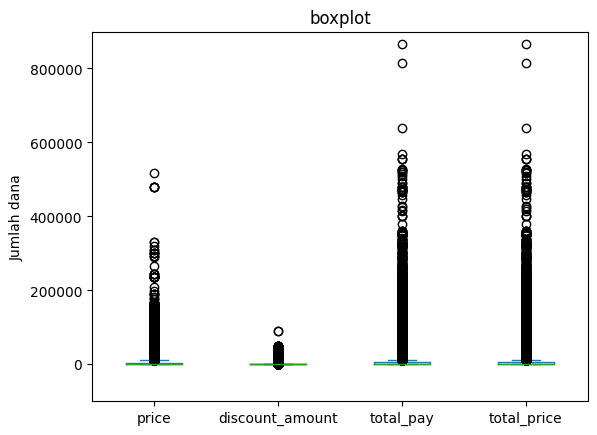

In [65]:
df[['price','discount_amount','total_pay','total_price']].plot(kind='box', title='boxplot')
plt.ylim(-100000,900000)
plt.ylabel('Jumlah dana')
plt.show()

Dari ke 4 kolom yang coba kita cek outliernya, semuanya memiiki data outlier sebesar 15%. terlihat pula dari df.describe() untuk menggambarkan deskriptif statistik yang dasar, kolom `price`, `qty_ordered`, `total_price`, `discount_amount`, dan `total_pay` perbedaan 75% dan max valuenya sangat besar. Hal ini juga menggambarkan kondisi outliers dari suatu kolom. Namun, kita tidak bisa melakukan drop terhadap data-data tersebut dikarenakan **kewajaran** dari data yang kita punya. `variasi harga` dari E-Commerce yang cukup tinggi mulai dari harga 1 sampai ratusan ribu karena memang category barang yang ditawarkan cukup banyak mulai perlengkapan bayi sampai alat-alat elektronik.

### **3.3 Data Bersih**
Kita sudah selesai membersihkan data kita, sekarang, mari kita lihat sekilas informasi dari data yang sudah kita bersihkan

In [66]:
listItem = []
for col in df.columns :
    listItem.append([col, df[col].dtype, df[col].isna().sum(),
                    df[col].nunique(), list(df[col].drop_duplicates().sample(2).values)]);

dfDesc = pd.DataFrame(columns=['dataFeatures', 'dataType', 'null', 'unique', 'uniqueSample'],
                     data=listItem)
print(df.shape)
dfDesc

(582992, 20)


,dataFeatures,dataType,null,unique,uniqueSample
0,item_id,int32,0,582992,"[750318, 598501]"
1,customer_id,int32,0,115212,"[49911, 51498]"
2,customer_since,period[M],0,26,"[2018-01, 2017-06]"
3,created_at,object,0,789,"[13/06/2017, 05/01/2018]"
4,sku,string,0,84556,"[BAGRAS59E847BB11F30, KABFAR5ACC9F7CA5229-0-18 Months]"
5,category,string,0,15,"[Mobiles & Tablets, Home & Living]"
6,price,float64,0,9115,"[10532.0, 2879.1]"
7,qty_ordered,float64,0,74,"[75.0, 72.0]"
8,total_price,float64,0,10804,"[5475.0, 4349.4]"
9,discount_amount,float64,0,28056,"[284.0, 1600.0]"


Sebelum dibersihkan, kita memiliki 1.048.575 baris data, sekarang kita memiliki 582.992 baris. Sekitar 420.000 baris data yang kosong dihapus, dan sisa data kosong diisi dengan data yang dirasa relevan.

## **4. Analisis**

Kita sudah melakukan tahap *data cleaning*. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu **Bagaimana hubungan diskon dengan karakteristik transaksi pada E-Commerce, terutama dibandingkan dengan tidak menggunakan fitur diskon**.

Pertama, kita perlu mengkategorikan transaksi yang memiliki diskon dan tidak memiliki diskon. untuk membantu kita mempermudah proses analisa.

In [67]:
df['diskon'] = np.where(df['discount_amount']>0, 'discount', 'no_discount')
df.head(4)

,item_id,customer_id,customer_since,created_at,sku,category,price,qty_ordered,total_price,discount_amount,total_pay,payment_method,working_date,status,bi_status,increment_id,fiscal_year,month,year,month_year,diskon
0,211131,1,2016-07,01/07/2016,kreations_YI 06-L,Women's Fashion,1950.0,1.0,1950.0,0.0,1950.0,COD,01/07/2016,completed,Net,100147443,FY17,7,2016,2016-07,no_discount
1,211133,2,2016-07,01/07/2016,kcc_Buy 2 Frey Air Freshener & Get 1 Kasual Body Spray Free,Beauty & Grooming,240.0,1.0,240.0,0.0,240.0,COD,01/07/2016,canceled,Gross,100147444,FY17,7,2016,2016-07,no_discount
2,211134,3,2016-07,01/07/2016,Ego_UP0017-999-MR0,Women's Fashion,2450.0,1.0,2450.0,0.0,2450.0,COD,01/07/2016,canceled,Gross,100147445,FY17,7,2016,2016-07,no_discount
3,211135,4,2016-07,01/07/2016,kcc_krone deal,Beauty & Grooming,360.0,1.0,360.0,300.0,60.0,COD,01/07/2016,completed,Net,100147446,FY17,7,2016,2016-07,discount


Analisis akan dilakukan dengan membandingkan data transaksi yang dengan diskon dan tidak dengan diskon berdasarkan fitur yang tersedia. karena dari 582.992 data yang kita miliki, 208.153 data berasal adalah transaksi dengan diskon, kita perlu berhati-hati dalam membandingkan data. Perbandingan lebih baik dilakukan berdasarkan ratio, terutama pada data bertipe kategorikal.

In [68]:
df['diskon'].value_counts()

no_discount    374839
discount       208153
Name: diskon, dtype: int64

In [69]:
df.to_csv(r'D:\Aal\Data_Science\Purwadhika\DS-ML\Modul-2\Capstone\dataset\Ali_Clean_Pakistan_largest_Ecomerce_Dataset.csv') #Save File ke CSV

### **4.1 Tren Revenue E-Commerce**

* Data yang digunakan setiap tahun berbeda, 2016 (7 bulan), 2017 (12 bulan), 2018 (7 bulan) sehingga kita akan melihat tren Revenue menggunakan Nilai Tengah. supaya kita ada gambaran bagaimana prospek E-Commerce kedepannya.
* Data yang digunakan pun adalah data dengan status transaksinya berhasil atau *completed* karena Revenue adalah dana yang sudah masuk kepada penjual [sumber](https://www.investopedia.com/terms/r/revenue.asp).

In [70]:
from scipy.stats import shapiro
stats, pval= shapiro(df['total_pay'].loc[df['status']=='completed'])
if pval>0.05:
    print('distribusi data pada kolom total_pay normal')
else:
    print('distribusi data pada kolom total_pay tidak normal')

distribusi data pada kolom total_pay tidak normal


Kita perlu mengetahui distribusi data pada kolom `total_pay` untuk menentukan metode guna mencari rata-rata dari kolom revenue setiap tahunnya

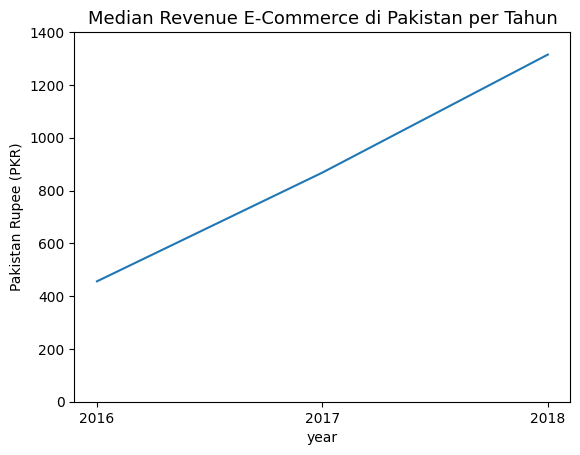

In [71]:
df.loc[df['status']=='completed'].groupby(['year'])['total_pay'].median().sort_index().plot.line()
plt.title('Median Revenue E-Commerce di Pakistan per Tahun', size=13)
plt.ylabel('Pakistan Rupee (PKR)')
plt.xticks(df['year'].unique())
plt.ylim(0,1400)
plt.rcParams["figure.figsize"] = (22, 3)
plt.show()

Tren Revenue E-Commerce dari 2016 ke 2018 Pakistan E-Commerce menunjukkan kenaikan, tentunya dimungkinkan di tahun-tahun ke depan Revenue akan semakin naik.

### **4.2 Hubungan Diskon terhadap Jumlah Transaksi**

Untuk Jumlah Transaksi, kita menggunakan seluruh transaksi tanpa melihat statusnya supaya ada gambaran *behaviour* pembeli di E-Commerce.<br>
mari kita lihat, hubungan diskon terhadap Jumlah Transaksi. kita akan menganalisis banyak diskon yang dipakai dengan jumlah transaksi untuk menjawab pertanyaan sebagai berikut:
* bagaimana banyak diskon yang dipakai setiap bulan dari 2016 sampai 2018?
* bagaimana banyak diskon yang dipakai setiap bulan dari 2016 sampai 2018 dibandingkan dengan jumlah transaksi?
* Apakah ada hubungan antara banyak diskon yang dipakai dengan jumlah transaksi?

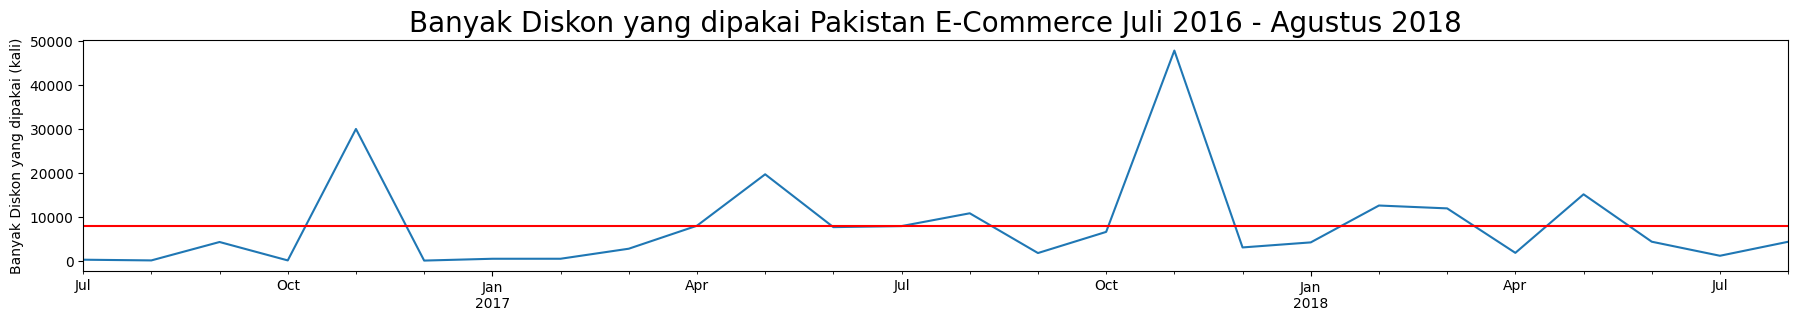

In [72]:
df['month_year'].loc[df['discount_amount']>0].value_counts().sort_index().plot.line()
plt.axhline(df['month_year'].loc[df['discount_amount']>0].value_counts().mean(), color='red')
plt.ylabel('Banyak Diskon yang dipakai (kali)')
plt.title('Banyak Diskon yang dipakai Pakistan E-Commerce Juli 2016 - Agustus 2018', size=20)
plt.rcParams["figure.figsize"] = (20, 7)
plt.show()

dari gambar diatas, kita melihat bahwa banyak diskon yang dipakai disetiap bulannya bervariasi, tetapi terlihat banyak diskon yang dipakai **diatas rata-rata** hanya pada 7/26 bulan yaitu **Nov'16, Mei'17, Agu'17, Nov'17, Feb'18, Mar'18, Mei'18**.

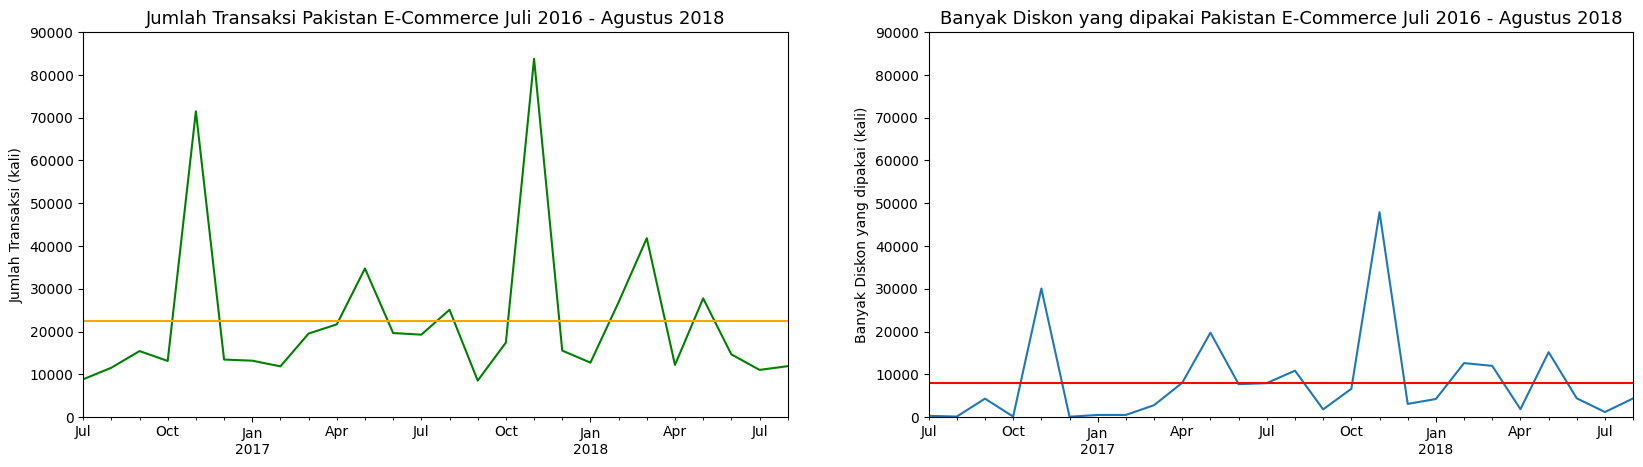

In [73]:
plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
df['month_year'].value_counts().sort_index().plot.line(color='green')
plt.ylabel('Jumlah Transaksi (kali)')
plt.title('Jumlah Transaksi Pakistan E-Commerce Juli 2016 - Agustus 2018', size=13)
plt.axhline(df['month_year'].value_counts().mean(), color='orange')
plt.ylim(0,90000)
plt.subplot(1,2,2)
df['month_year'].loc[df['discount_amount']>0].value_counts().sort_index().plot.line()
plt.axhline(df['month_year'].loc[df['discount_amount']>0].value_counts().mean(), color='red')
plt.ylabel('Banyak Diskon yang dipakai (kali)')
plt.title('Banyak Diskon yang dipakai Pakistan E-Commerce Juli 2016 - Agustus 2018', size=13)
plt.ylim(0,90000)
plt.show()

Secara visual, kita bisa melihat bahwa jumlah transaksi mengikuti banyak diskon yang dipakai yaitu jumlah transaksi **di atas rata-rata** pada bulan **Nov'16, Mei'17, Agu'17, Nov'17, Feb'18, Mar'18, Mei'18**. dimana pada bulan itu juga banyak diskon yang dipakai berada pada kondisi di atas rata-rata.

Sangat tingginya jumlah transaksi yang dilakukan pada Nov'16 dan Nov'17, salah satunya dikarenakan penawaran yang menggiurkan dengan diskon yang besar-besaran pada [*Black Friday*](https://medium.com/peekabooguru/black-friday-2016-all-the-deals-discounts-the-survival-guide-ec629d342c9b).

Untuk membuktikan hubungan dari banyak diskon yang dipakai dan jumlah transaksi kita perlu mencari korelasinya. namun, kita perlu cek dulu distribusi pada jumlah transaksi dan banyak diskon yang dipakai untuk menentukan penggunaan metode korelasinya.

kita buat terlebih dahulu dataFrame baru yang berisikan jumlah diskon dan jumlah transaksi setiap bulannya.

In [74]:
bulan = []
jml_transaksi=[]
diskon_pakai=[]
for i in df['month_year'].unique():
        bulan.append(i)
        jml_transaksi.append(df['month_year'].value_counts().sort_index()[i])
        diskon_pakai.append(df['month_year'].loc[df['discount_amount']>0].value_counts().sort_index()[i])
jumlah=pd.DataFrame({'Month_Year': bulan, 'jml_transaksi':jml_transaksi, 'diskon_pakai':diskon_pakai})
jumlah.set_index('Month_Year', inplace=True)
jumlah.head()

,jml_transaksi,diskon_pakai
Month_Year,,
2016-07,8831,282
2016-08,11534,122
2016-09,15432,4314
2016-10,13121,122
2016-11,71488,30054


In [75]:
# Test Distribusi data pada kolom diskon_pakai
from scipy.stats import shapiro
stat, pval = shapiro(jumlah['diskon_pakai'])
if pval <= 0.05:
    print('Distribusi tidak Normal') # Ha
else:
    print('Distribusi Normal') # H0

Distribusi tidak Normal


In [76]:
# Test Distribusi data pada kolom diskon_pakai
from scipy.stats import shapiro
stat, pval = shapiro(jumlah['jml_transaksi'])
if pval <= 0.05:
    print('Distribusi tidak Normal') # Ha
else:
    print('Distribusi Normal') # H0

Distribusi tidak Normal


banyak diskon yang terpakai dan jumlah transaksi sama-sama tidak berdistribusi normal, sehingga kita menggunakan metode non-parametrik untuk mengetahui korelasi dari kedua kolom tersebut yaitu menggunakan methode `Spearman`. tapi kita juga ingin lihat korelasinya dalam bentuk visual untuk menggambarkan seperti apa korelasi datanya.

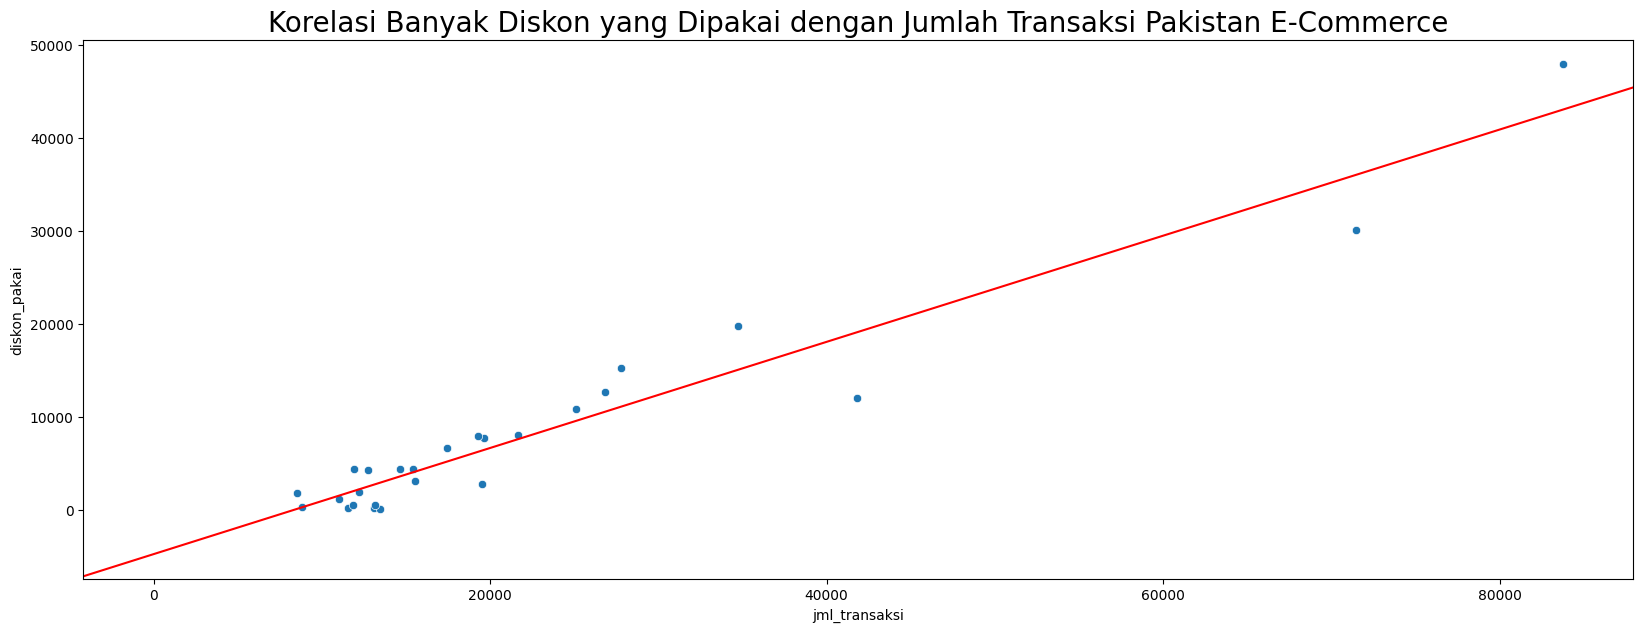

In [77]:
sns.scatterplot(x = jumlah['jml_transaksi'],y = jumlah['diskon_pakai'])
plt.title('Korelasi Banyak Diskon yang Dipakai dengan Jumlah Transaksi Pakistan E-Commerce', size=20)
m, b = np.polyfit(jumlah['jml_transaksi'], jumlah['diskon_pakai'], deg=1)
plt.axline(xy1=(0, b), slope=m, color='r', label=f'$y = {m:.2f}x {b:+.2f}$')
plt.rcParams["figure.figsize"] = (22, 5)
plt.show()

In [78]:
jumlah[['jml_transaksi','diskon_pakai']].corr(method='spearman')

,jml_transaksi,diskon_pakai
jml_transaksi,1.000000,0.860318
diskon_pakai,0.860318,1.000000


ternyata memang ada hubungan antara banyak diskon yang dipakai dan jumlah transaksi, dimana hubungan tersebut bernilai **positif** dan tergolong **hubungan yang kuat**. artinya, semakin banyak diskon yang digunakan semakin banyak pula transaksi yang terjadi.

### **4.3 Diskon Berdasarkan Category**

mari kita lihat, hubungan diskon berdasarkan category. kita akan menganalisis banyak diskon yang dipakai dengan category untuk menjawab pertanyaan sebagai berikut:
* Manakah Kategori dengan transaksi terbanyak?
* Manakah Kategori yang memakai diskon terbanyak?
* Apakah ada hubungan antara Banyak diskon yang dipakai dengan Kategori?

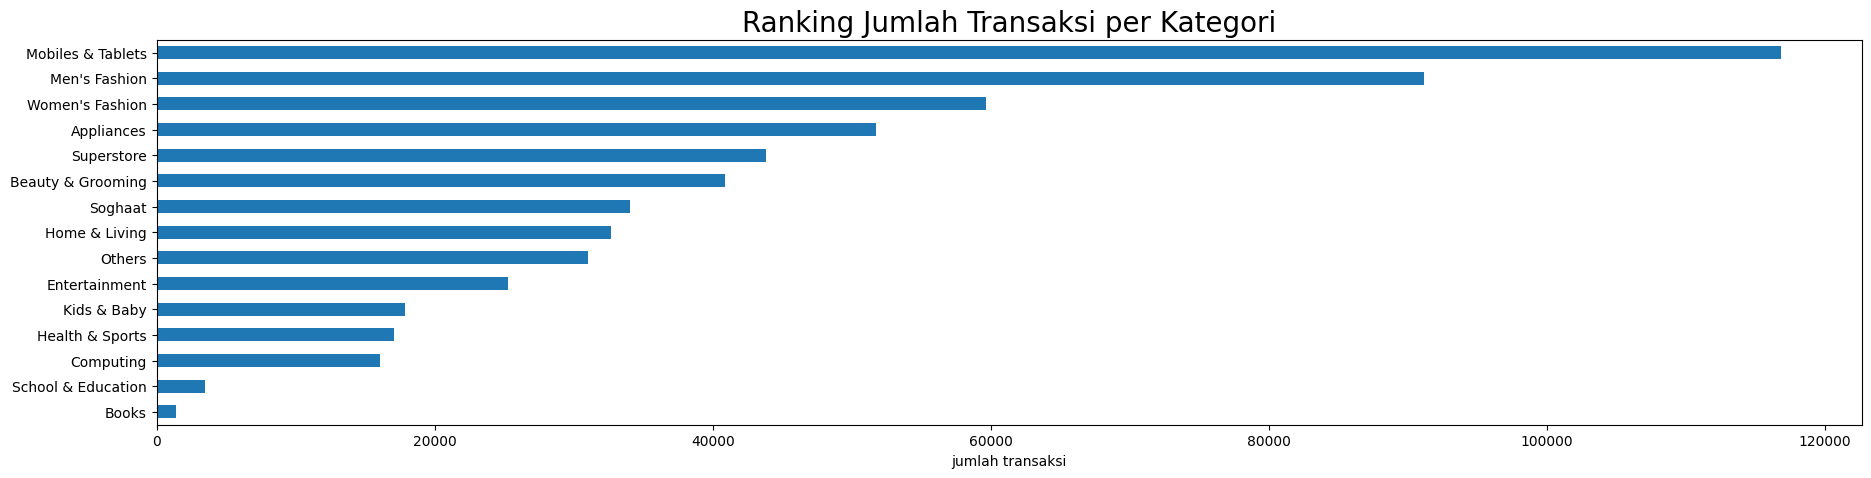

In [79]:
df['category'].value_counts().sort_values().plot.barh()
plt.title('Ranking Jumlah Transaksi per Kategori', size=20)
plt.xlabel('jumlah transaksi')
plt.rcParams["figure.figsize"] = (22, 3)
plt.show()

Kategori `Mobiles & Tablets` menjadi kategori paling banyak jumlah transaksinya. Ponsel semakin menjadi bagian dari kehidupan sehari-hari anak muda di Pakistan [(Jurnal)](https://files.eric.ed.gov/fulltext/EJ1154625.pdf). `Men's Fashion` dan `Women's Fashion` berada di urutan 2 dan 3 karena kebutuhan akan fashion (kebutuhan sandang) sangat digandrungi [sumber_1](https://www.theguardian.com/world/2018/nov/24/pakistan-fashion-becomes-battleground-power-of-women) dan [sumber_2](https://www.dawn.com/news/1099623).

In [80]:
df_chi= pd.crosstab(df['category'],df['diskon'])

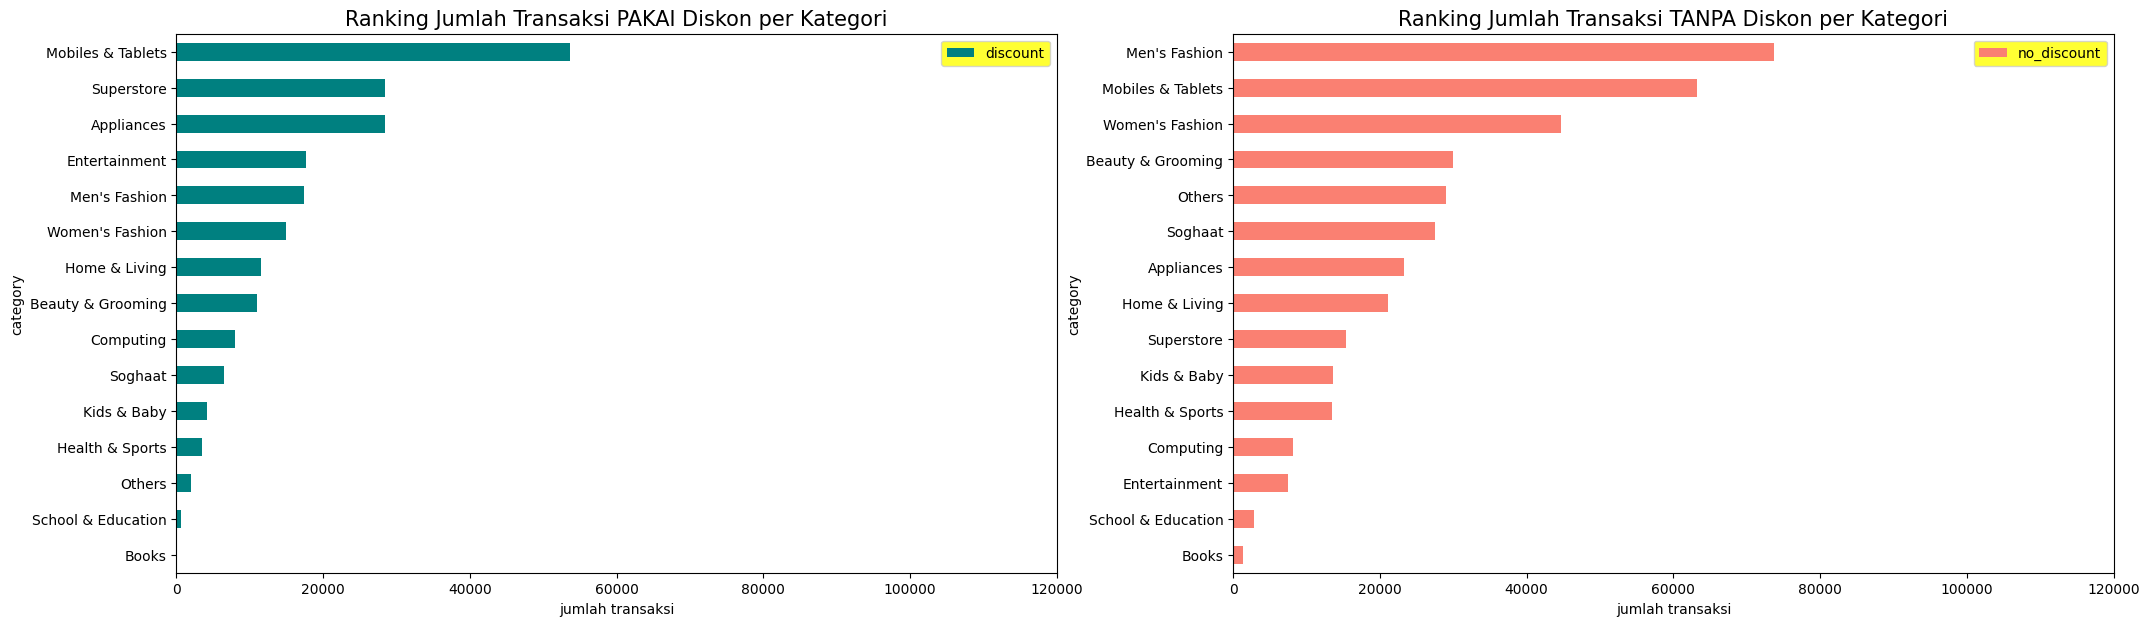

In [81]:
plt.rcParams["figure.figsize"] = (25, 7)
plt.subplot(1,2,1)
df_chi['discount'].sort_values().plot(kind='barh', stacked=True, color='teal')
plt.title('Ranking Jumlah Transaksi PAKAI Diskon per Kategori', size=15)
plt.xlabel('jumlah transaksi')
plt.legend(facecolor='yellow')
plt.xlim(0,120000)
plt.subplot(1,2,2)
df_chi['no_discount'].sort_values().plot(kind='barh', stacked=True, color='salmon')
plt.title('Ranking Jumlah Transaksi TANPA Diskon per Kategori', size=15)
plt.xlabel('jumlah transaksi')
plt.xlim(0,120000)
plt.legend(facecolor='yellow')
plt.show()

In [82]:
for i in ['category']:
    fig=px.sunburst(df,path=[i,'diskon'],color='diskon', title=f'Proporsi Diskon Berdasarkan {i}')
    fig.show()

Dari grafik di atas, kita bisa melihat bahwa:
* `Mobiles & Tablets` merupakan kategori yang memakai diskon terbanyak yang mana kategori ini pula yang merupakan kategori dengan jumlah transkasi terbanyak
* `Entertainment`, `Appliances` dan `Superstore` merupakan kategori dengan diskon yang dipakai terbanyak setelah `Mobiles & Tablet` namun jumlah transaksi mereka masih dibawah `Men's Fashion` dan `Women's Fashion` meskipun dengan transaksi menggunakan diskon yang lebih sedikit.

Sepertinya ini memang strategi dari E-Commerce untuk menarik minat dari pembeli karena memang harga `Mobiles & Tablets` relatif lebih tinggi dibanding kategori yang lainnya.<br>
Sedangkan `Men's Fashion` dan `Women's Fashion` memiliki harga yang relatif rendah sehingga tidak perlu memberikan banyak diskon untuk menarik minat pembeli.

In [83]:
df.groupby('category')['price'].median().sort_values(ascending=False)

category
Entertainment         19480.0
Mobiles & Tablets     12599.0
Appliances            5065.0 
Computing             2899.0 
Women's Fashion       1261.0 
Others                1000.0 
Men's Fashion         699.0  
Home & Living         649.0  
Health & Sports       420.0  
Beauty & Grooming     369.0  
Kids & Baby           350.0  
Books                 319.0  
School & Education    281.0  
Superstore            250.0  
Soghaat               205.0  
Name: price, dtype: float64

In [84]:
display(pd.crosstab(df['category'],df['diskon'], normalize='index').sort_values(by='discount', ascending=False).style.format('{:.2%}'))

diskon,discount,no_discount
category,,
Entertainment,70.30%,29.70%
Superstore,64.92%,35.08%
Appliances,55.00%,45.00%
Computing,49.41%,50.59%
Mobiles & Tablets,45.92%,54.08%
Home & Living,35.33%,64.67%
Beauty & Grooming,26.76%,73.24%
Women's Fashion,25.02%,74.98%
Kids & Baby,23.80%,76.20%


In [85]:
score, pval, dof,exp=chi2_contingency(df_chi)
if pval<=0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

# H0: 2 Variable tidak berhubungan (independent)
# Ha: 2 Variable saling berhubungan (dependent)

Tolak Ho


Uji Statistik membuktikan bahwa variable `diskon` dan variable `category` bersifat dependent (saling berhubungan). 

Terlihat pada Cross Tabulasi:
* Transaksi pada Kategori `Entertainment` dan `Superstore` memiliki kecenderungan menggunakan diskon. Sedangkan transaksi pada `Mobiles & Tablets` yang notabene memiliki jumlah transaksi terbanyak **tidak terlalu memperlihatkan kecenderungan**. ilustrasinya, dari 100 transaksi, 46 menggunakan diskon sedangkan sisanya tidak menggunakan diskon.
* Transaksi pada kategori `Others`, `Books` dan `School & Education` terlihat sangat cenderung **tidak** menggunakan diskon. Sedangkan `Men's Fashion` dan `Women's Fashion` yang berada pada posisi ke-2 dan ke-3 secara jumlah transaksi cenderung **tanpa diskon**.

### **4.4 Diskon Berdasarkan Payment Method**

mari kita lihat, Hubungan diskon berdasarkan payment method. kita akan menganalisis banyak diskon yang dipakai dengan payment method untuk menjawab pertanyaan sebagai berikut:
* Manakah Payment Method dengan transaksi terbanyak?
* Manakah Payment Method yang memakai diskon terbanyak?
* Apakah ada hubungan antara diskon dengan payment method?

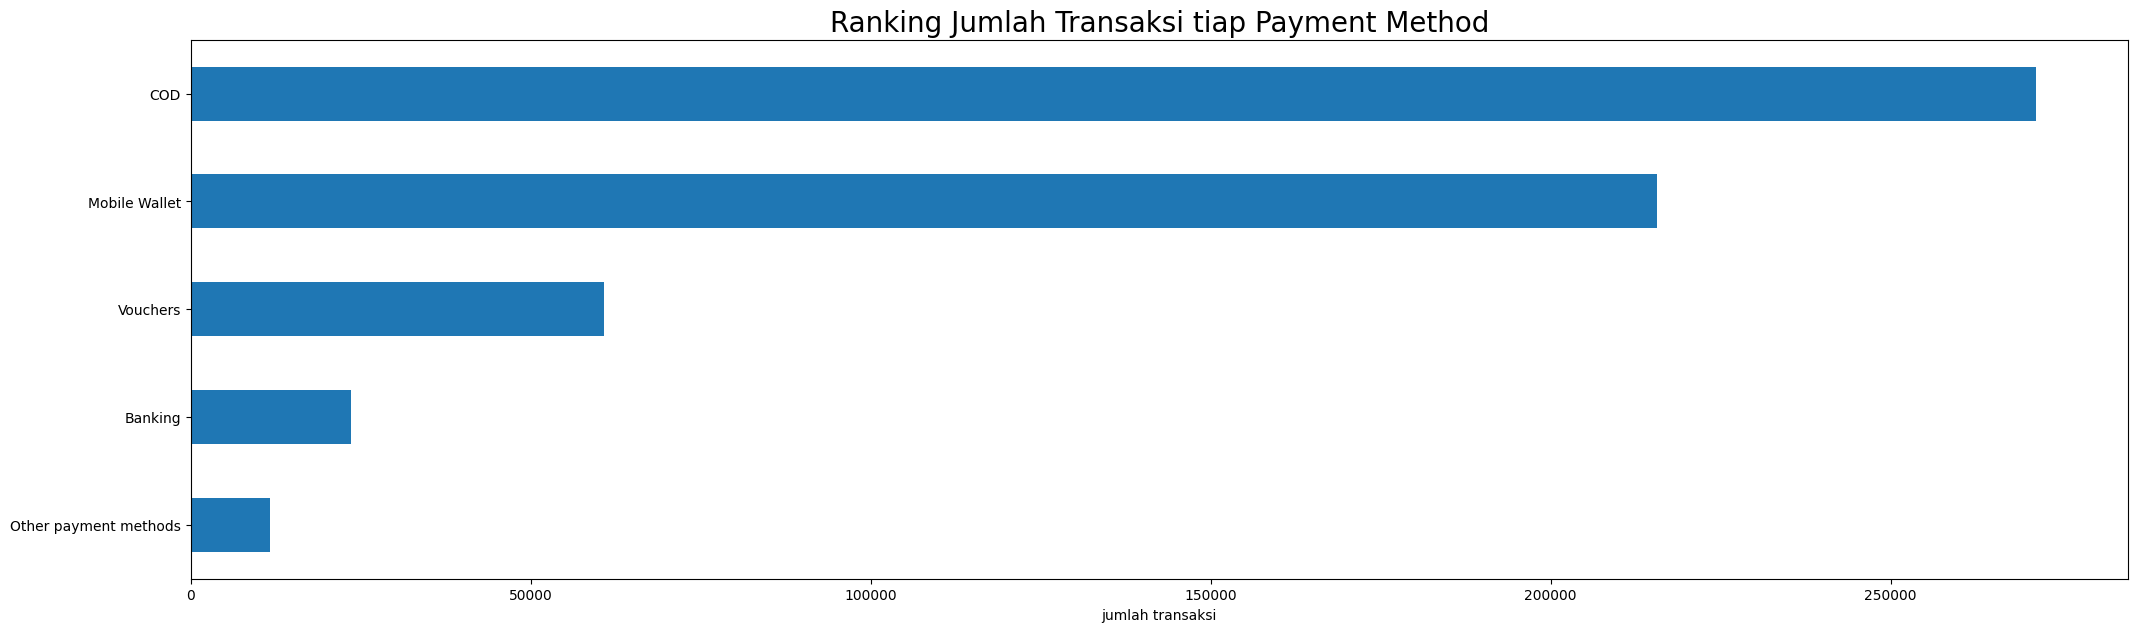

In [86]:
df['payment_method'].value_counts().sort_values().plot.barh()
plt.title('Ranking Jumlah Transaksi tiap Payment Method', size=20)
plt.xlabel('jumlah transaksi')
plt.rcParams["figure.figsize"] = (22, 5)
plt.show()

`COD` merupakan metode pembayaran yang terpopuler di Pakistan period Juli 2016 - Agustus 2018. `COD` adalah opsi pembayaran yang diinginkan orang Pakistan karena memberi mereka rasa aman dan nyaman. Selain itu, mereka memilih `COD` karena lebih bisa mengontrol pembelian barang mereka [jurnal](https://sci-hub.se/10.1177/2158244020917392).

In [87]:
df_ct= pd.crosstab(df['payment_method'],df['diskon'])

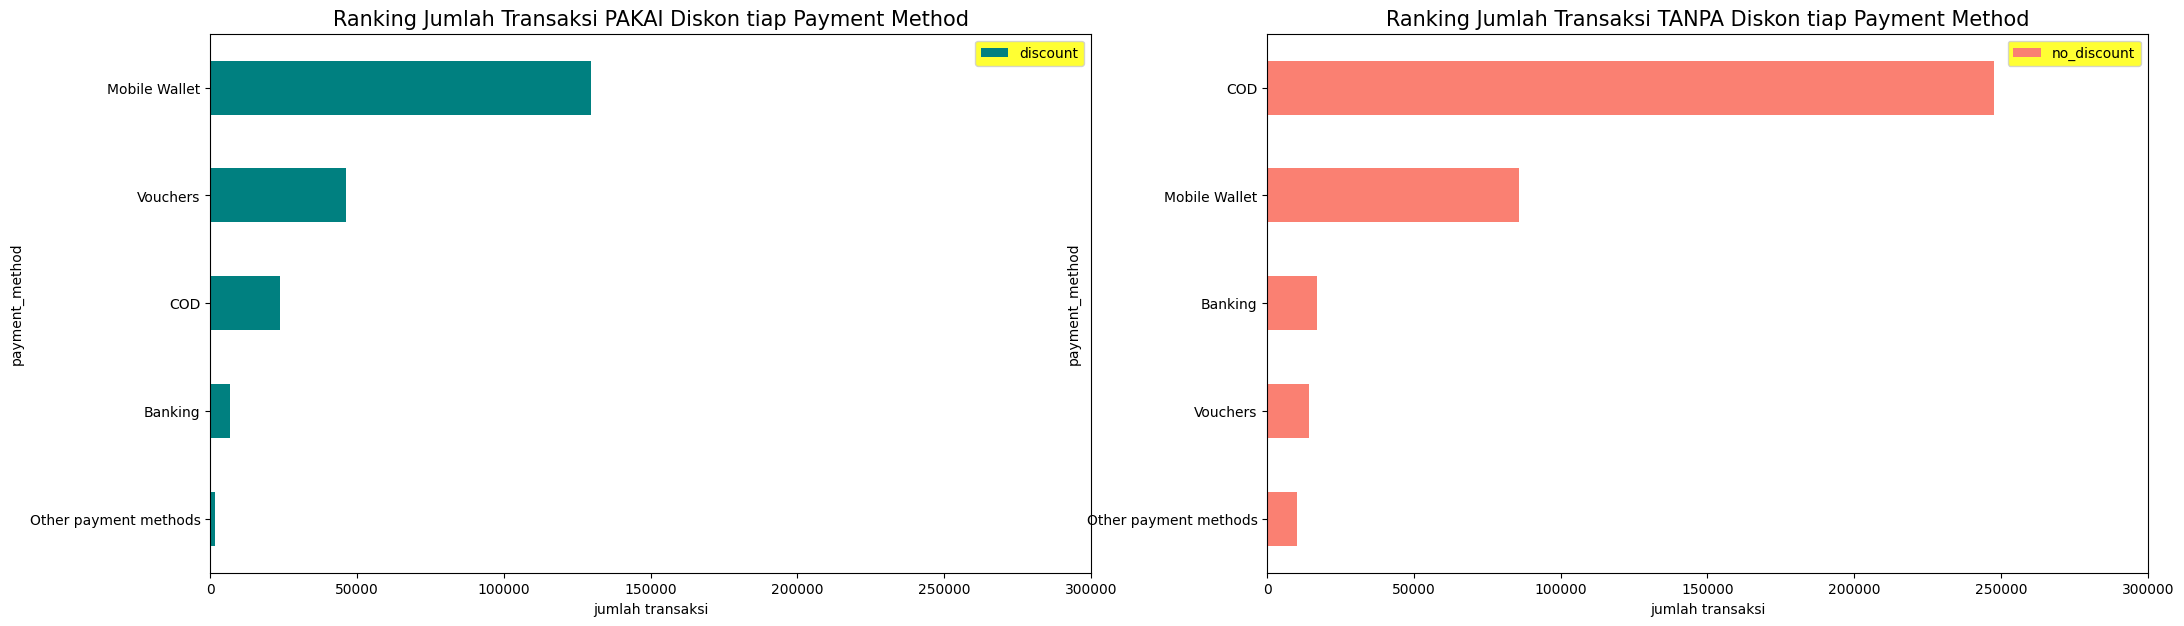

In [88]:
plt.rcParams["figure.figsize"] = (25, 7)
plt.subplot(1,2,1)
df_ct['discount'].sort_values().plot(kind='barh', stacked=True, color='teal')
plt.title('Ranking Jumlah Transaksi PAKAI Diskon tiap Payment Method', size=15)
plt.xlabel('jumlah transaksi')
plt.legend(facecolor='yellow')
plt.xlim(0,300000)
plt.subplot(1,2,2)
df_ct['no_discount'].sort_values().plot(kind='barh', stacked=True, color='salmon')
plt.title('Ranking Jumlah Transaksi TANPA Diskon tiap Payment Method', size=15)
plt.xlabel('jumlah transaksi')
plt.xlim(0,300000)
plt.legend(facecolor='yellow')
plt.show()

In [89]:
for i in ['payment_method']:
    fig=px.sunburst(df,path=[i,'diskon'],color='diskon', title=f'Proporsi Diskon Berdasarkan {i}')
    fig.show()

Dari grafik di atas, kita bisa melihat bahwa:
* `Mobile Wallet` merupakan payment_method yang memakai diskon terbanyak meskipun bukan menjadi metode yang paling banyak digunakan.
* `COD` merupakan payment_method yang paling banyak digunakan meskipun diskon yang dipakai sangat sedikit dibanding tanpa diskon.
* `Vouchers` menawarkan Rasio Diskon terbserar dibanding `payment_method` yang lain

E-Commerce menawarkan diskon yang sangat banyak pada `Mobile Wallet` tentunya dikarenakan kemudahan transaksi yang dilakukan, artinya aliran dana transaksi dari pembeli lebih mudah dan lebih cepat diterima oleh penjual, sehingga E-Commerce mendorong pembeli menggunakan `Mobile Wallet` dengan memberikan banyak diskon .<br>
`COD` merupakan model metode pembayaran lama, dimana **ada barang, ada dana**, meskipun paling banyak digunakan oleh orang Pakistan namun metode ini cukup merepotkan karena dana yang diberikan penjual pasti lebih lama sampai ke penjual, sehingga sangat sedikit diskon yang diberikan tentunya untuk mendorong orang Pakistan supaya mulai meninggalkan metode ini [sumber](https://techcrunch.com/2022/08/29/postex-acquires-call-courier-to-become-pakistans-larger-e-commerce-service-provider/).

In [90]:
display(pd.crosstab(df['payment_method'],df['diskon'], normalize='index').sort_values(by='discount', ascending=False).style.format('{:.2%}'))

diskon,discount,no_discount
payment_method,,
Vouchers,76.30%,23.70%
Mobile Wallet,60.14%,39.86%
Banking,28.49%,71.51%
Other payment methods,13.79%,86.21%
COD,8.77%,91.23%


In [91]:
score, pval, dof,exp=chi2_contingency(df_ct)
if pval<=0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

# H0: 2 Variable tidak berhubungan (independent)
# Ha: 2 Variable saling berhubungan (dependent)

Tolak Ho


Uji Statistik membuktikan bahwa variable `diskon` dan variable `payment_method` bersifat dependent (saling berhubungan). 

Terlihat pada Cross Tabulasi:
* Transaksi dengan `Vouchers` dan `Mobile Wallet` memiliki kecenderungan menggunakan diskon. Sedangkan transaksi dengan *payment_method* yang lain cenderung tidak menggunakan diskon, termasuk cara pembayaran `COD` meskipun menjadi cara pembayaran terbanyak di Pakistan E-Commerce.

### **4.5 Diskon Berdasarkan Status**

mari kita lihat, transaksi dengan diskon maupun tidak berdasarkan Status. kita akan menganalisis banyak diskon yang dipakai dengan Status untuk menjawab pertanyaan sebagai berikut:
* Bagaimana status transaksi Pakistan E-Commerce?
* Apakah ada hubungan antara diskon dengan status transaksi?

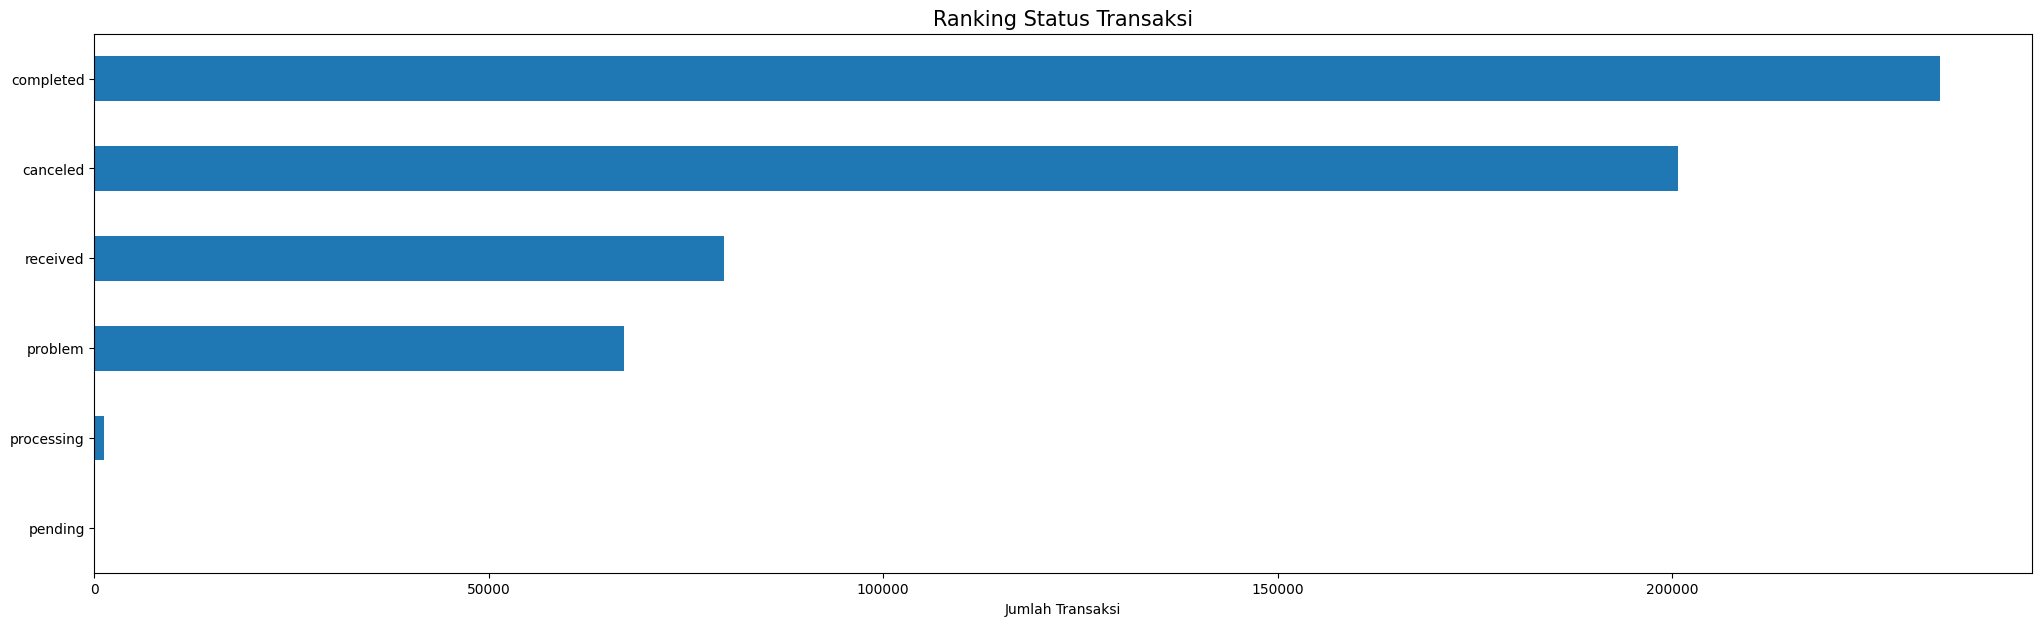

In [92]:
df['status'].value_counts().sort_values().plot.barh()
plt.rcParams["figure.figsize"] = (22, 4)
plt.title('Ranking Status Transaksi', size=15)
plt.xlabel('Jumlah Transaksi')
plt.show()

Kebanyakan Transaksi E-Commerce sukses atau `completed` dengan total lebih dari 230.000 transaksi artinya dana transaksi sudah disalurkan ke penjual, namun transaksi yang batal atau `canceled` dan juga yang bermasalah atau `problem` tergolong sangat tinggi dengan angka lebih dari 200.000 transaksi. Tentunya banyak faktor yang mempengaruhi `canceled` bisa dari problem dari penjual, seperti tidak updatenya stok, dimana stok aktual 0 tapi masih tertulis lebih dari 0 di E-Commerce dll atau problem dari pembeli, seperti salah menuliskan alamat dll [sumber](https://propakistani.pk/2015/05/13/online-shops-lie-about-their-inventory-and-this-is-killing-e-commerce-industry-in-pakistan/).

In [93]:
for i in ['status']:
    fig=px.sunburst(df,path=[i,'diskon'],color='diskon', title=f'Proporsi Diskon Berdasarkan {i}')
    fig.show()

In [94]:
df_ct_3 = pd.crosstab(df['status'],df['diskon'])
display(pd.crosstab(df['status'],df['diskon'], normalize='index').sort_values(by='discount', ascending=False).style.format('{:.2%}'))

diskon,discount,no_discount
status,,
processing,62.30%,37.70%
canceled,44.25%,55.75%
pending,37.21%,62.79%
completed,34.57%,65.43%
received,33.97%,66.03%
problem,15.67%,84.33%


In [95]:
score, pval, dof,exp=chi2_contingency(df_ct_3)
if pval<=0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

# H0: 2 Variable tidak berhubungan (independent)
# Ha: 2 Variable saling berhubungan (dependent)

Tolak Ho


Uji statistik di atas menunjukkan bahwa variable `diskon` saling berhubungan (dependent) dengan variable `status`.

Terlihat pada Cross Tabulasi:
* Pembatalan transaksi atau *canceled* tidak terlalu memperlihatkan kecenderunganan, ilustrasinya dari 100 transaksi 55 diantaranya melakukan *cancellation*. Transaksi yang bersamalah atau *problem* sangat cenderung pada transaksi **tanpa** menggunakan diskon. Transaksi *problem* berisi transaksi yang di-*refund*, *Exchange* dan *Fraud*. transaksi yang bermasalah tentunya harus sangat diperhatikan karena sangat merugikan penjual utamanya secara material dan juga non-material (user review dll).

### **4.6 Hubungan Diskon terhadap Total Revenue**

Untuk Revenue kita menggunakan transaksi dengan status *completed* karena kita beranggapan revenue adalah dana yang sudah masuk ke penjual.<br>
mari kita lihat, hubungan diskon terhadap Jumlah Revenue pada setiap kategori dan payment method. kita akan menganalisis diskon yang dipakai dengan Total Revenue untuk menjawab pertanyaan sebagai berikut:
* Manakah kategori yang transaksi memilki Total Revenue tertinggi?
* Manakah payment method yang transaksi memilki Total Revenue tertinggi?
* Apakah rata-rata transaksi menggunakan diskon sama dengan rata-rata transaksi tanpa diskon?

**4.6.1 Total Revenue berdasarkan Category**

In [96]:
indexing = []
revenue_diskon=[]
revenue_no_diskon=[]
for i in df['category'].unique():
        indexing.append(i)
        revenue_diskon.append(df.loc[(df['status']=='completed') & (df['diskon']=='discount')].groupby(['category'])['total_pay'].sum().sort_index()[i])
        revenue_no_diskon.append(df.loc[(df['status']=='completed') & (df['diskon']=='no_discount')].groupby(['category'])['total_pay'].sum().sort_index()[i])
jumlah_revenue=pd.DataFrame({'cat_1':indexing, 'revenue_diskon':revenue_diskon, 'revenue_no_diskon':revenue_no_diskon})
jumlah_revenue.set_index('cat_1',inplace=True)
jumlah_revenue.sort_values(by='revenue_diskon', ascending=False)

,revenue_diskon,revenue_no_diskon
cat_1,,
Mobiles & Tablets,3.114055e+08,1.609614e+08
Entertainment,1.308377e+08,2.049782e+07
Appliances,1.170506e+08,4.923435e+07
Computing,2.544599e+07,1.104020e+07
Women's Fashion,6.255934e+06,3.493413e+07
Superstore,6.131602e+06,5.152541e+06
Home & Living,3.388488e+06,9.880858e+06
Men's Fashion,3.345485e+06,2.718955e+07
Beauty & Grooming,2.559368e+06,1.373755e+07


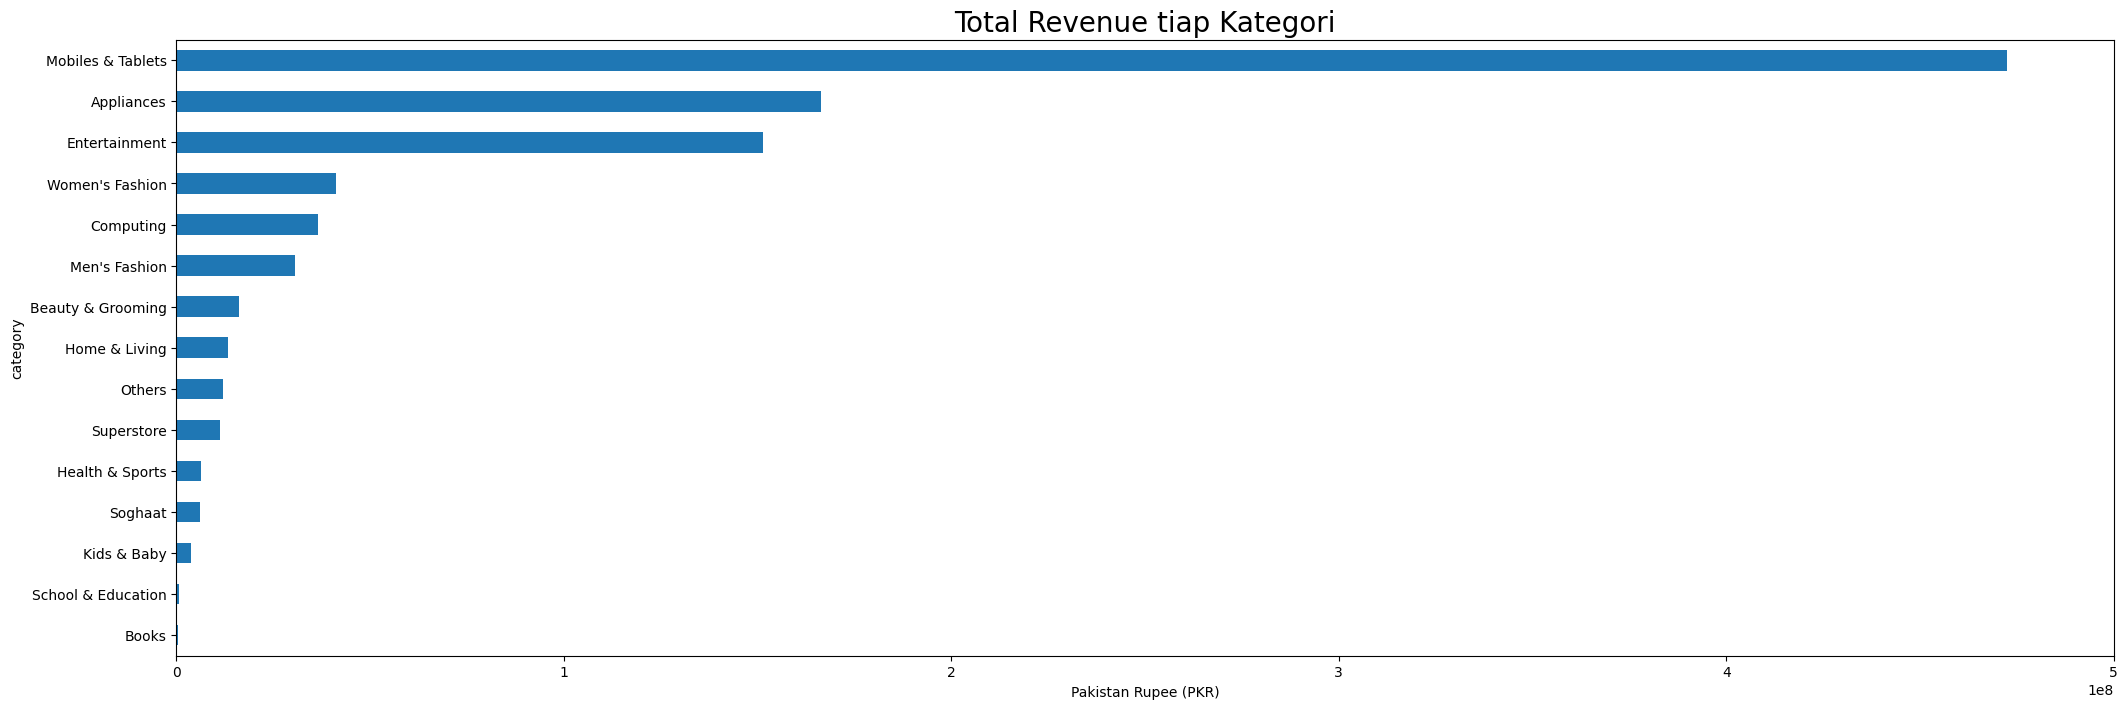

In [97]:
plt.rcParams["figure.figsize"] = (25, 8)
df.loc[df['status']=='completed'].groupby('category')['total_pay'].sum().sort_values().plot(kind='barh')
plt.title('Total Revenue tiap Kategori', size=20)
plt.xlabel('Pakistan Rupee (PKR)')
plt.xlim(0,500000000)
plt.show()

* Revenue transaksi dengan diskon pada kategori `Mobiles & Tablets` tercatat berada pada posisi teratas jauh mengungguli posisi ke-2 yaitu `Appliances` dengan margin lebih dari **300%**. Jika kita ingat pada sub-bab 4.3 juga diketahui bahwa jumlah transaksi pada `Mobiles & Tablets` terbanyak.
* `Men's Fashion` yang memiliki jumlah transaksi terbanyak ke-2, berada pada posisi ke-6 Total Revenue.

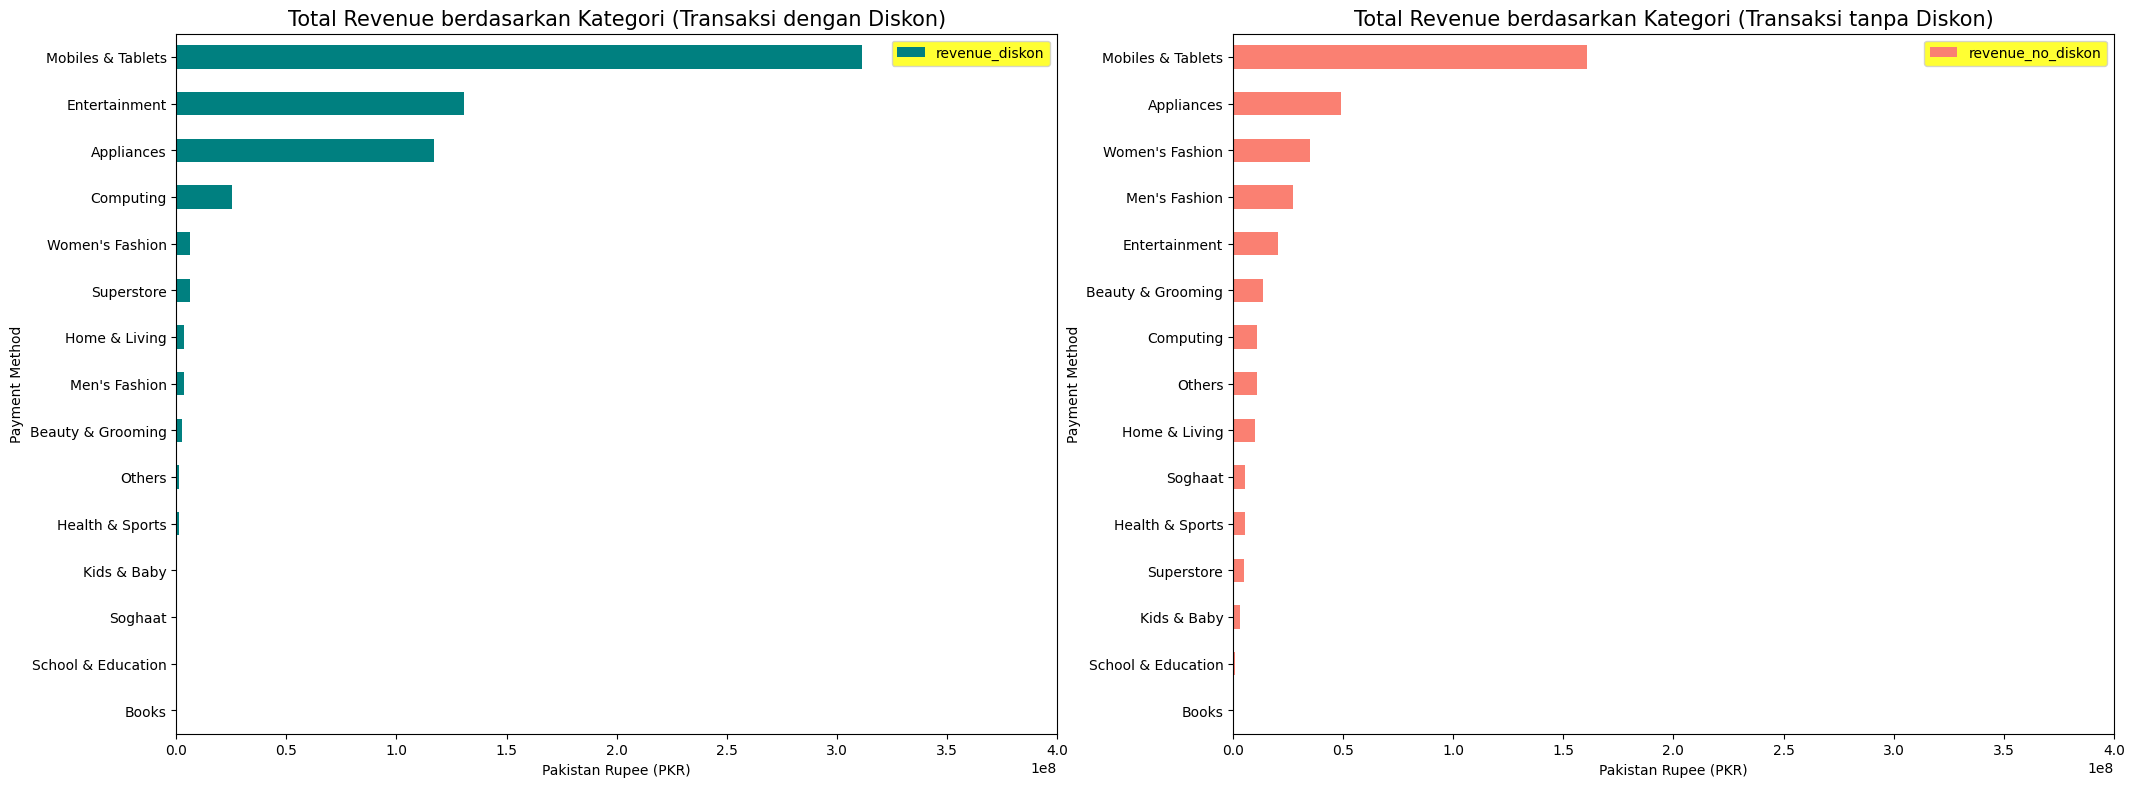

In [98]:
plt.rcParams["figure.figsize"] = (25, 20)
plt.subplot(2,2,1)
jumlah_revenue['revenue_diskon'].sort_values().plot(kind='barh', color='teal')
plt.xlim(0,400000000)
plt.ylabel('Payment Method')
plt.xlabel('Pakistan Rupee (PKR)')
plt.title('Total Revenue berdasarkan Kategori (Transaksi dengan Diskon)', size=15)
plt.legend(loc='upper right', facecolor='yellow')
plt.subplot(2,2,2)
jumlah_revenue['revenue_no_diskon'].sort_values().plot(kind='barh', color='salmon')
plt.xlim(0,400000000)
plt.ylabel('Payment Method')
plt.xlabel('Pakistan Rupee (PKR)')
plt.title('Total Revenue berdasarkan Kategori (Transaksi tanpa Diskon)', size=15)
plt.legend(loc='upper right', facecolor='yellow')
plt.show()

* Tingginya Revenue pada `Mobiles & Tablets` terjadi pada transaksi dengan diskon maupun tanpa diskon. Hal ini dikarenakan jumlah transaksi yang sangat besar dengan harga yang relatif tinggi.
* Meskipun median harganya tertinggi diantara kategori lain, `Entertainment` mencatat total revenue yang cukup tinggi dan berada pada posisi ke-3 dengan sumbangan revenue terbesar pada transaski menggunakan diskon.
* Total Revenue `Men's Fashion` maupun `Women's Fashion` mayoritas disumbang oleh transaksi tanpa diskon.

**4.6.2 Total Revenue berdasarkan Payment Method**

In [99]:
indexing_paym = []
revenue_diskon_paym=[]
revenue_no_diskon_paym=[]
for i in df['payment_method'].unique():
        indexing_paym.append(i)
        revenue_diskon_paym.append(df.loc[(df['status']=='completed') & (df['diskon']=='discount')].groupby(['payment_method'])['total_pay'].sum().sort_index()[i])
        revenue_no_diskon_paym.append(df.loc[(df['status']=='completed') & (df['diskon']=='no_discount')].groupby(['payment_method'])['total_pay'].sum().sort_index()[i])
jumlah_revenue_paym=pd.DataFrame({'paym':indexing_paym, 'revenue_diskon':revenue_diskon_paym, 'revenue_no_diskon':revenue_no_diskon_paym})
jumlah_revenue_paym.set_index('paym',inplace=True)
jumlah_revenue_paym.sort_values(by='revenue_diskon', ascending=False)

,revenue_diskon,revenue_no_diskon
paym,,
Vouchers,3.187921e+08,3.273729e+07
Mobile Wallet,2.557983e+08,5.461130e+07
COD,2.852427e+07,2.501316e+08
Banking,4.731185e+06,4.237169e+06
Other payment methods,2.194105e+06,1.710880e+07


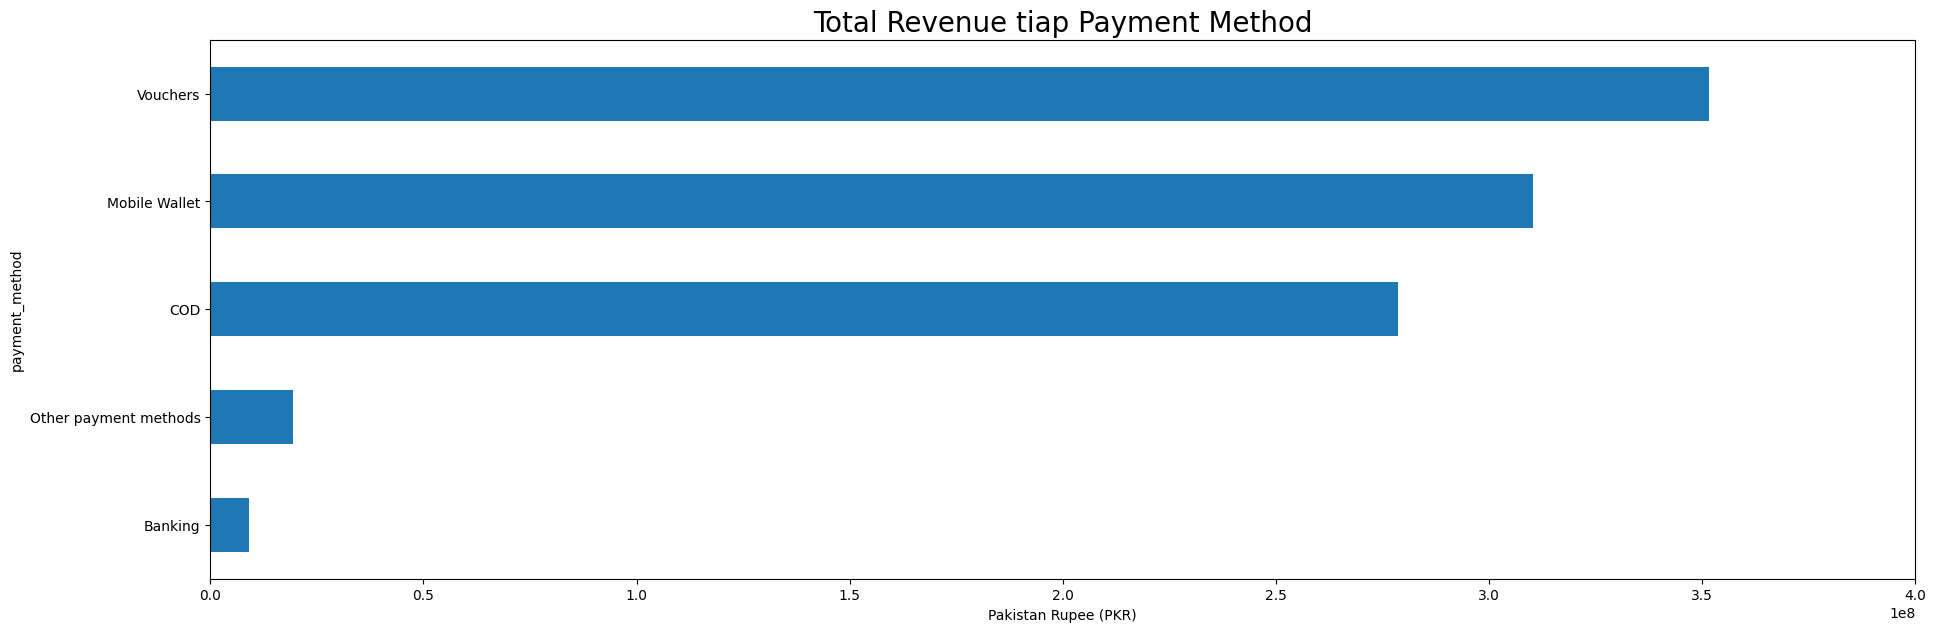

In [100]:
plt.rcParams["figure.figsize"] = (22, 7)
df.loc[df['status']=='completed'].groupby('payment_method')['total_pay'].sum().sort_values().plot(kind='barh')
plt.title('Total Revenue tiap Payment Method', size=20)
plt.xlabel('Pakistan Rupee (PKR)')
plt.xlim(0,400000000)
plt.show()

* Payment method menggunakan `Vouchers` menghasilkan Revenue transaksi dengan diskon yang lebih besar dibandingkan `COD`, meskipun `COD` sangat digemari di Pakistan. Voucher e-commerce adalah alat yang efektif untuk meningkatkan penjualan dan keuntungan, dan ketika digunakan dengan benar menjadi bermanfaat bagi bisnis. Pelanggan tetap menikmati dan senang menerima penawaran khusus, meskipun mereka tahu bahwa mereka dapat meminta potongan harga untuk produk apa pun [sumber_1](https://migovi.com/2023/01/30/how-e-commerce-vouchers-turn-out-to-be-a-game-changer/) [sumber_2](https://www.researchgate.net/publication/326501432_Consumer_Willingness_to_Use_Digital_Coupons_A_Case_of_Karachi_Market_in_Pakistan).

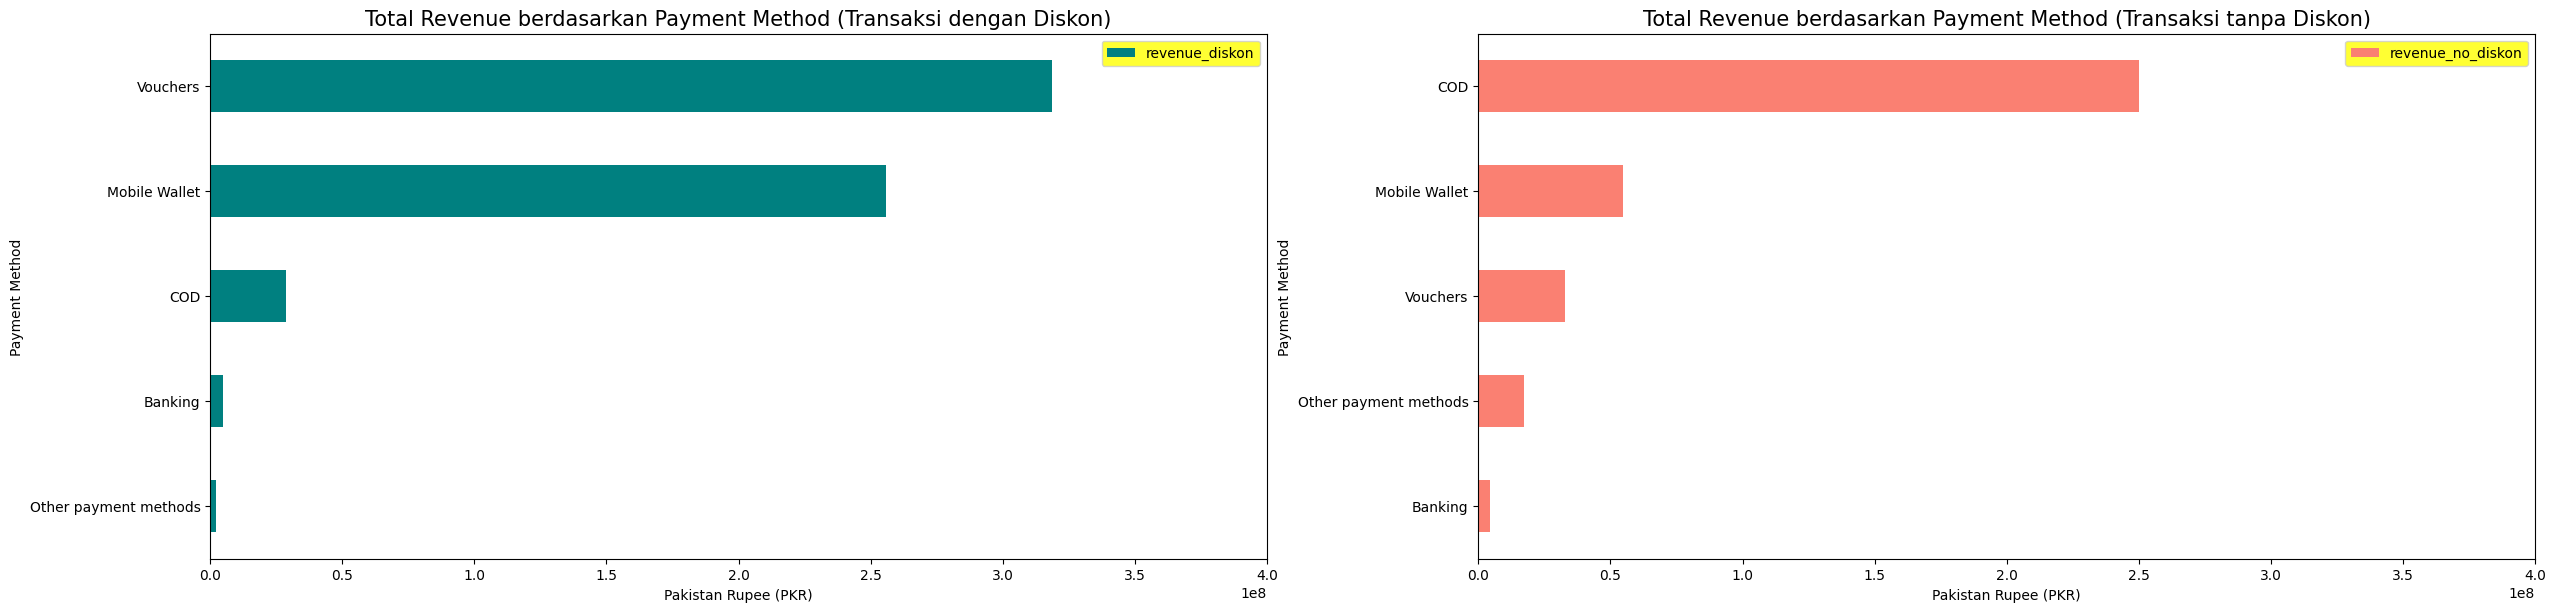

In [101]:
plt.rcParams["figure.figsize"] = (30, 15)
plt.subplot(2,2,1)
jumlah_revenue_paym['revenue_diskon'].sort_values().plot(kind='barh', color='teal')
plt.xlim(0,400000000)
plt.ylabel('Payment Method')
plt.xlabel('Pakistan Rupee (PKR)')
plt.title('Total Revenue berdasarkan Payment Method (Transaksi dengan Diskon)', size=15)
plt.legend(loc='upper right', facecolor='yellow')
plt.subplot(2,2,2)
jumlah_revenue_paym['revenue_no_diskon'].sort_values().plot(kind='barh', color='salmon')
plt.xlim(0,400000000)
plt.ylabel('Payment Method')
plt.xlabel('Pakistan Rupee (PKR)')
plt.title('Total Revenue berdasarkan Payment Method (Transaksi tanpa Diskon)', size=15)
plt.legend(loc='upper right', facecolor='yellow')
plt.show()

* Pada sub-bab 4.4 diketahui bahwa mayoritas orang yang payment methodnya menggunakan `Voucher's` bertransaksi dengan diskon, hal ini linear dengan Total Revenue `Voucher's` yang mayoritas disumbangkan transaksi dengan diskon.
* Sebagian Orang Pakistan cukup percaya diri dengan digital membeli barang dengan `Voucher's` meskipun harga barang yang dibeli relatif tinggi.
* Revenue `COD` sangat berbeda jauh dibandingkan dengan kategori lain pada transaksi tanpa diskon.
* Nampaknya keyakinan orang Pakistan terhadap digital payment masih kurang terlihat dari Median Harga barang yang dibeli dengan cara `COD` ini paling rendah dibandingkan dengan kategori lain.

In [102]:
df.groupby('payment_method')['price'].median().sort_values(ascending=False)

payment_method
Vouchers                 5650.00
Banking                  2446.65
Mobile Wallet            1199.00
Other payment methods    949.00 
COD                      650.00 
Name: price, dtype: float64

Kita perlu melakukan pengujian, untuk mengetaui apakah rata-rata Revenue transaksi dengan diskon sama dengan rata-rata Revenue transaksi tanpa diskon. namun, kita perlu melakukan uji normalitas untuk mengetahui metode apa yang akan kita pakai.

In [103]:
from scipy.stats import shapiro
stats, pval= shapiro(df['total_pay'].loc[df['status']=='completed'])
if pval>0.05:
    print('distribusi data pada kolom total_pay normal')
else:
    print('distribusi data pada kolom total_pay tidak normal')

distribusi data pada kolom total_pay tidak normal


distribusi data pada `total_pay` tidak normal, sehingga ini termasuk non-parametrik. kita perlu menggunakan uji **Mann-Whitney** karena dua populasi yang independen (tidak saling berkaitan). uji ini untuk mengetahui apakah rata-rata Revenue transaksi dengan diskon sama dengan rata-rata Revenue transaksi tanpa diskon

In [104]:
from scipy.stats import mannwhitneyu

result = list(mannwhitneyu(
    df[(df['diskon']=='discount') & (df['status']=='completed')]['total_pay'],
    df[(df['diskon']=='no_discount') & (df['status']=='completed')]['total_pay'],
    alternative='greater'
))

print('p-value', result[1])

# conclusion
if result[1] <= 0.05:
    print('Tolak H0')
else:
    print('Terima H0')

# H0: Rata-rata Revenue Transaksi dengan diskon = Rata-rata Revenue transaksi tanpa diskon
# Ha: Rata-rata Revenue Transaksi dengan diskon > Rata-rata Revenue transaksi tanpa diskon

p-value 0.0
Tolak H0


Hasil uji statistik, menunjukkan ada perbedaan rata-rata Revenue transaksi dengan diskon sama dengan rata-rata Revenue transaksi tanpa diskon, yang mana rata-rata Revenue transaksi dengan diskon **lebih besar** dibanding tanpa diskon.

## **5. Kesimpulan dan Rekomendasi**

### **5.1 Kesimpulan**

Dari analisis yang telah dilakukan, kita dapat menarik kesimpulan tentang transaksi pada E-Commerce di Pakistan:
* Tren Revenue E-Commerce di Pakistan naik dari 2016 sampai 2018
* Dari 582.992 data transaksi, 208.153 transaksi yang menggunakan diskon atau 35.70% dari keseluruhan data.
* Jumlah diskon yang dipakai setiap bulannya memiliki variasi yang cukup tinggi.
* `Mobiles & Tablets` menjadi kategori yang paling banyak jumlah transaksinya.
* Transaksi dengan `COD` merupakan cara yang paling digemari di Pakistan.
* Jumlah transaksi *canceled* dan *problem* relatif cukup tinggi, meskipun transaksi *completed* masih yang tertinggi.
* Total Revenue pada kategori `Mobiles & Tablets` menjadi yang tertinggi
* Transaksi menggunakan `Vouchers` menyumbang total revenue tertinggi.

Hubungan diskon dengan karakteristik transaksi pada E-Commerce Pakistan , dibandingkan dengan transaksi tanpa diskon:
* Jumlah transaksi yang menggunakan diskon memiliki hubungan yang kuat dengan jumlah transaksi, artinya semakin banyak transaksi yang menggunakan diskon maka semakin banyak pula transaksi yang terjadi.
* Transaksi menggunakan diskon cenderung terjadi pada kategori dengan harga yang relatif lebih tinggi yaitu pada `Entertainment` dan `Appliances`.
* Orang Pakistan lebih suka menggunakan diskon pada pembayaran menggunakan `Vouchers` dan `Mobile Wallet`.
* Meskipun cenderung tidak terjadi *problem*, angka transaksi *canceled* pada transaksi yang menggunakan diskon relatif cukup tinggi.
* Rata-rata revenue transaksi menggunakan diskon lebih besar daripada tanpa diskon

### **5.2 Rekomendasi**

Diskon menjadi fitur yang sangat penting karena terbukti dapat meningkatkan jumlah transaksi dan mendapatkan revenue yang lebih baik dibanding tanpa menggunakan diskon. Kita mencoba memberikan rekomendasi guna semakin meningkatkan jumlah transaksi dan revenue.
1. Penawaran diskon dilakukan lebih merata setiap bulannya, tidak terpaku pada *Black Friday* yang terjadi di bulan November. Bisa dilakukan dengan metode `1.1` artinya tanggal 1 di bulan Januari dan dilakukan sama di bulan selanjutnya `2.2`, `3.3` dst. atau bisa juga dengan memanfaatkan momen Hari Pakistan maupun Hari Kemerdekaan.
2. Berikan diskon untuk item yang harganya relatif lebih tinggi.
3. Fokus pemberian diskon pada transaksi yang menggunakan `Vouchers` dan `Mobile Wallet` guna mendorong masyarakat beralih dari transaksi `COD` untuk memperkecil potensi terjadinya masalah terutama pada aliran dana transaksi.
4. Transaksi *canceled* dan *problem* tentunya menghambat revenue yang didapatkan. Namun, belum bisa dipastikan penyebab dari transaksi *canceled* maupun *problem*. Perlu analisa lebih mendalam untuk mendapatkan informasi yang relevan terkait hal tersebut. Namun, kita coba untuk memberikan saran guna memperkecil transaksi *canceled* maupun *problem*:
    * Berikan informasi yang jelas pada kolom deskripsi supaya menghindari *miss-information*
    * Lakukan QC dan Video proses pengemasan sebelum produk dikirim ke pembeli
    * Update Stok secara berkala
    * Cantumkan gambar yang sesungguhnya dengan resolusi yang baik
    * Process pengiriman sebelum due date
    * Meminta pembeli untuk melakukan proses video saat unboxing
    * Memberikan jasa asuransi pada barang